In [59]:
pip install qmt

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# pd.read_\WISDM_ar_latest\WISDM_ar_v1.1\WISDM_ar_v1.1_raw.txt

In [62]:
#33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286

In [63]:
# C:\Users\koust\OneDrive\Desktop\Course Prep\Dissertation\WISDM_ar_latest\WISDM_ar_v1.1\WISDM_ar_v1.1_raw.txt

In [64]:
file = open('C:/Users/koust/OneDrive/Desktop/Course Prep/Dissertation/WISDM_ar_latest/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

Error at line number:  281873
Error at line number:  281874
Error at line number:  281875


In [65]:
processedList

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [66]:
columns = ['User', 'Activity', 'Timestamp', 'x', 'y', 'z']

In [67]:
data = pd.DataFrame(data = processedList, columns = columns)
data.head()

User Activity       Timestamp            x          y            z
0   33  Jogging  49105962326000   -0.6946377  12.680544   0.50395286
1   33  Jogging  49106062271000     5.012288  11.264028   0.95342433
2   33  Jogging  49106112167000     4.903325  10.882658  -0.08172209
3   33  Jogging  49106222305000  -0.61291564  18.496431    3.0237172
4   33  Jogging  49106332290000   -1.1849703  12.108489     7.205164

In [68]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

In [69]:
data['Timestamp'] = data['Timestamp'].astype('float')

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   User       343416 non-null  object 
 1   Activity   343416 non-null  object 
 2   Timestamp  343416 non-null  float64
 3   x          343416 non-null  float64
 4   y          343416 non-null  float64
 5   z          343416 non-null  float64
dtypes: float64(4), object(2)
memory usage: 15.7+ MB


In [71]:
import dateutil
from datetime import datetime
from zoneinfo import ZoneInfo

In [72]:
df_copy = data.copy()
df_copy['Time_secs'] = df_copy['Timestamp']*1e-9

In [73]:
df_copy['Segment'] = (df_copy['User'] + df_copy['Activity']).ne((df_copy['User'] + df_copy['Activity']).shift()).cumsum()

In [170]:
df_copy

User Activity     Timestamp         x          y         z  \
0        33  Jogging  4.910596e+13 -0.694638  12.680544  0.503953   
1        33  Jogging  4.910606e+13  5.012288  11.264028  0.953424   
2        33  Jogging  4.910611e+13  4.903325  10.882658 -0.081722   
3        33  Jogging  4.910622e+13 -0.612916  18.496431  3.023717   
4        33  Jogging  4.910633e+13 -1.184970  12.108489  7.205164   
...     ...      ...           ...       ...        ...       ...   
343411   11  Walking  1.786872e+12  0.310000  10.730000  0.040861   
343412   11  Walking  1.786922e+12  2.760000  10.950000  0.844462   
343413   11  Walking  1.786972e+12  0.800000  10.150000  1.334794   
343414   11  Walking  1.787022e+12 -1.570000   8.690000  1.416516   
343415   11  Walking  1.787072e+12 -2.560000   8.580000  1.879608   

           Time_secs  Segment  
0       49105.962326        1  
1       49106.062271        1  
2       49106.112167        1  
3       49106.222305        1  
4       49106.332290        1  
...              ...      ...  
343411   1786.872234      141  
343412   1786.922282      141  
343413   1786.972392      141  
343414   1787.022227      141  
343415   1787.072368      141  

[343416 rows x 8 columns]

In [76]:
df_copy.Segment.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141])

In [77]:
# df_copy.set_index('Time_secs', inplace= True)
# df_copy.index = pd.to_datetime(df_copy.index)

In [78]:
# df_copy.head()

In [79]:
# def plot_activity(activity, df):
#     data = df[(df['Activity'] == activity) & (df['User'] == '27')][['User','Time_secs','x', 'y', 'z','Segment']]
#     axis = data["x"].plot(subplots=True, title=activity, color="b")
#     axis = data["y"].plot(subplots=True, title=activity, color="r")
#     axis = data["z"].plot(subplots=True, title=activity, color="g")
#     for ax in axis:
#         ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
#     vis = data
#     return vis

In [80]:
def plot_activity(activity, df):
    data = df[(df['Activity'] == activity)][['User','Time_secs','x', 'y', 'z','Segment']][:200]
    axis = data["x"].plot(subplots=True, title=activity, color="b")
    axis = data["y"].plot(subplots=True, title=activity, color="r")
    axis = data["z"].plot(subplots=True, title=activity, color="g")
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
    # vis = data
    # return vis

In [81]:
# df_copy[df_copy['Activity'] == "Sitting"]['Segment'].value_counts()

In [82]:
df_copy[df_copy['User'] == '27'].Activity.unique()

array(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting',
       'Standing'], dtype=object)

In [83]:
# df_copy[(df_copy['Activity'] == activity) & (df_copy['User'] == 1)]['Segment'].unique()

In [84]:
# def plot_activity(activity, df):
#     unique_segments = df[(df['Activity'] == activity) & (df['User'] == '27')]['Segment'].unique()
#     if len(unique_segments) > 0:
#         segment_to_plot = unique_segments[0]  # Select any one of the unique segments
#         data = df[(df['Activity'] == activity) & (df['User'] == '27') & (df['Segment'] == segment_to_plot)][['Time_secs', 'x', 'y', 'z', 'Segment']]
#         axis = data["x"].plot(subplots=True, title=f"{activity} - Segment {segment_to_plot}", color="b")
#         axis = data["y"].plot(subplots=True, title=f"{activity} - Segment {segment_to_plot}", color="r")
#         axis = data["z"].plot(subplots=True, title=f"{activity} - Segment {segment_to_plot}", color="g")
#         for ax in axis:
#             ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
#         return data
#     else:
#         print(f"No data found for activity {activity} with 'User' equal to 1.")
#         return None


In [85]:
df_copy[df_copy.Segment==1]

User Activity     Timestamp         x          y         z     Time_secs  \
0     33  Jogging  4.910596e+13 -0.694638  12.680544  0.503953  49105.962326   
1     33  Jogging  4.910606e+13  5.012288  11.264028  0.953424  49106.062271   
2     33  Jogging  4.910611e+13  4.903325  10.882658 -0.081722  49106.112167   
3     33  Jogging  4.910622e+13 -0.612916  18.496431  3.023717  49106.222305   
4     33  Jogging  4.910633e+13 -1.184970  12.108489  7.205164  49106.332290   
..   ...      ...           ...       ...        ...       ...           ...   
592   33  Jogging  4.916891e+13  1.307553   3.173541 -0.612916  49168.912429   
593   33  Jogging  4.918379e+13 -1.116869   2.642348  8.076866  49183.789535   
594   33  Jogging  4.918387e+13 -0.994285   3.023717  8.308413  49183.874710   
595   33  Jogging  4.918393e+13 -1.076008   3.445948  8.049625  49183.932357   
596   33  Jogging  4.918404e+13 -1.076008   5.216593  6.891896  49184.042312   

     Segment  
0          1  
1          1  
2          1  
3          1  
4          1  
..       ...  
592        1  
593        1  
594        1  
595        1  
596        1  

[597 rows x 8 columns]

In [86]:
# df_copy[df_copy.Segment==1].plot(x='Time_secs', y=['x',  'y',  'z'], subplots=True, layout=[3,1])

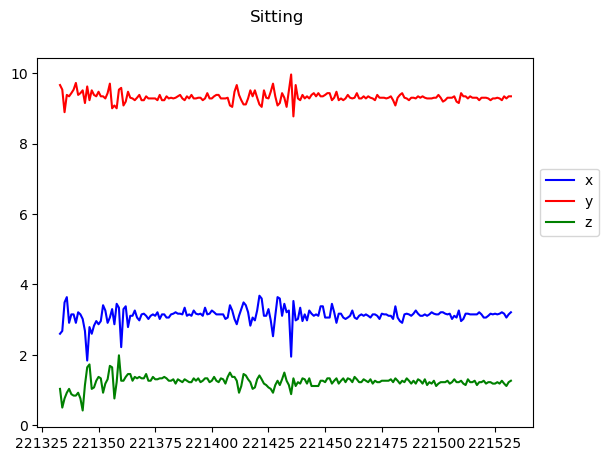

In [87]:
plot_activity("Sitting", df_copy)

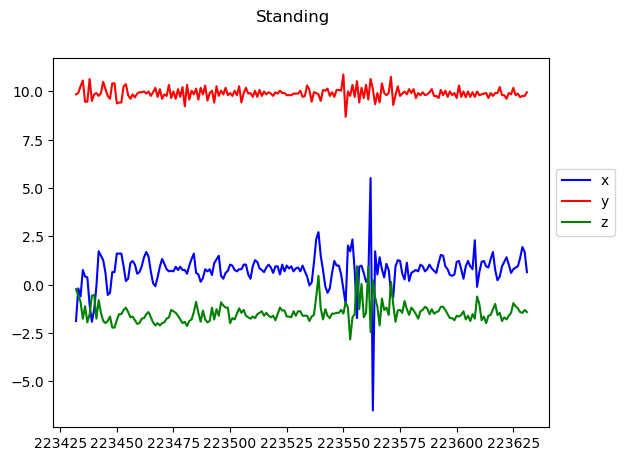

In [88]:
plot_activity("Standing", df_copy)

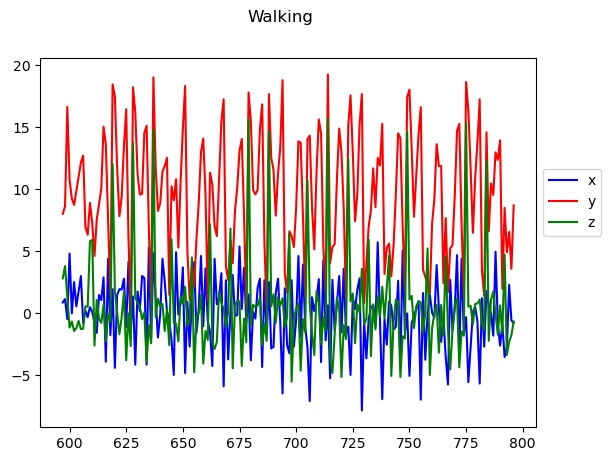

In [89]:
plot_activity("Walking", df_copy)

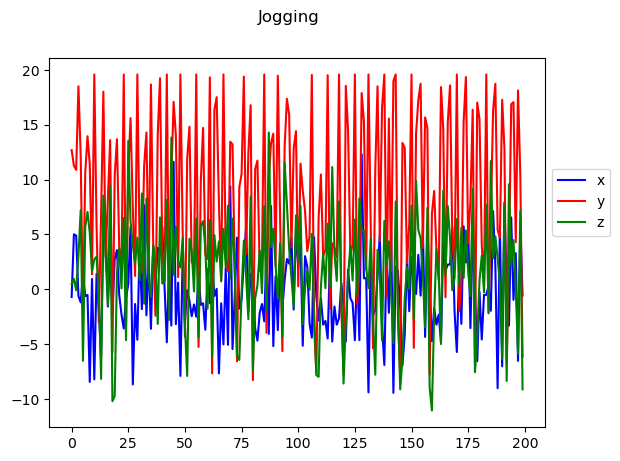

In [90]:
plot_activity("Jogging", df_copy)

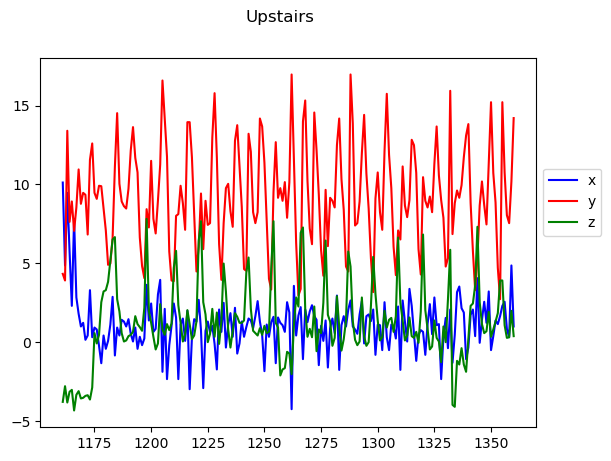

In [91]:
plot_activity("Upstairs", df_copy)

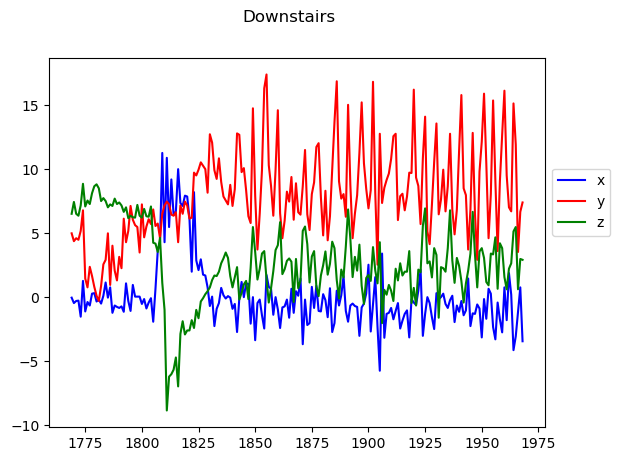

In [92]:
plot_activity("Downstairs", df_copy)

In [93]:
# import matplotlib.pyplot as plt

# def plot_activity(activity, df, max_rows=600):
#     """
#     Plots x, y, z accelerometer data as subplots for a specific activity.

#     Parameters:
#     - activity: String, the activity to filter the DataFrame.
#     - df: DataFrame, containing the accelerometer data.
#     - max_rows: Integer, the maximum number of rows to plot.
#     """
#     # Filter the data for the specified activity and select the required columns
#     data = df[(df['Activity'] == activity)][['User', 'Time_secs', 'x', 'y', 'z', 'Segment']][:max_rows]
    
#     # Create a figure with 3 subplots arranged in a 3x1 grid
#     fig, axs = plt.subplots(3, 1, figsize=(20, 7), sharex=True)

#     xaxis = data['Time_secs']

#     # Plot x-axis data
#     axs[0].plot(xaxis, data['x'], label='x', linewidth=1.0, color='blue')
#     axs[0].set_title('X-axis')
#     axs[0].legend()

#     # Plot y-axis data
#     axs[1].plot(xaxis, data['y'], label='y', linewidth=1.0, color='green')
#     axs[1].set_title('Y-axis')
#     axs[1].legend()

#     # Plot z-axis data
#     axs[2].plot(xaxis, data['z'], label='z', linewidth=1.0, color='red')
#     axs[2].set_title('Z-axis')
#     axs[2].legend()

#     # Set x-axis label for the bottom subplot
#     axs[2].set_xlabel('Time_secs')

#     # Add an overall title to the figure
#     fig.suptitle(activity, fontsize=16)

#     # Adjust layout to prevent overlap, taking into account the overall title
#     plt.tight_layout(rect=[0, 0, 1, 0.96])

#     # Display the plot
#     plt.show()

# # Example usage:
# # plot_activity('Walking', df)


In [94]:
import matplotlib.pyplot as plt

def plot_activity(activity, df, max_rows=600):
    """
    Plots x, y, z accelerometer data as subplots for a specific activity.

    Parameters:
    - activity: String, the activity to filter the DataFrame.
    - df: DataFrame, containing the accelerometer data.
    - max_rows: Integer, the maximum number of rows to plot.
    """
    # Filter the data for the specified activity and select the required columns
    data = df[(df['Activity'] == activity)][['User', 'Time_secs', 'x', 'y', 'z', 'Segment', 'DateTime']][:max_rows]
    
    # Create a figure with 3 subplots arranged in a 3x1 grid
    fig, axs = plt.subplots(3, 1, figsize=(20, 7), sharex=True)

    xaxis = data['DateTime']

    # Plot x-axis data
    axs[0].plot(xaxis, data['x'], label='x', linewidth=1.0, color='blue')
    axs[0].set_title('X-axis')
    axs[0].legend()

    # Plot y-axis data
    axs[1].plot(xaxis, data['y'], label='y', linewidth=1.0, color='green')
    axs[1].set_title('Y-axis')
    axs[1].legend()

    # Plot z-axis data
    axs[2].plot(xaxis, data['z'], label='z', linewidth=1.0, color='red')
    axs[2].set_title('Z-axis')
    axs[2].legend()

    # Set x-axis label for the bottom subplot
    axs[2].set_xlabel('Time_secs')

    # Add an overall title to the figure
    fig.suptitle(activity, fontsize=16)

    # Adjust layout to prevent overlap, taking into account the overall title
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Display the plot
    plt.show()

# Example usage:
# plot_activity('Walking', df)


In [95]:
# plot_activity("Upstairs", df_copy)

In [96]:
data1 = df_copy.copy()

In [97]:
import datetime

In [98]:
from datetime import datetime

In [99]:
# data1['DateTime']= data1['Timestamp'].apply(lambda x: datetime.fromtimestamp(x / 1e6))

In [100]:
# data1.head()

In [101]:
data1['DateTime'] = pd.to_datetime(data1['Timestamp'], unit='ns')

In [102]:
data1.tail(30)

User Activity     Timestamp     x      y         z    Time_secs  \
343386   11  Walking  1.785622e+12 -2.30  16.09  3.214402  1785.622234   
343387   11  Walking  1.785672e+12 -0.15   8.69 -2.751310  1785.672282   
343388   11  Walking  1.785722e+12  0.61   9.92 -1.144109  1785.722209   
343389   11  Walking  1.785772e+12  0.27  12.60  0.340509  1785.772258   
343390   11  Walking  1.785822e+12  2.11   8.05 -0.190685  1785.822215   
343391   11  Walking  1.785872e+12 -0.46   4.86 -1.457377  1785.872234   
343392   11  Walking  1.785922e+12 -3.11   9.15  1.797886  1785.922252   
343393   11  Walking  1.785972e+12 -1.50  10.23  1.838747  1785.972270   
343394   11  Walking  1.786022e+12 -0.34  10.80  3.990762  1786.022197   
343395   11  Walking  1.786072e+12  0.11  11.92  0.503953  1786.072276   
343396   11  Walking  1.786122e+12 -0.11  14.29  2.533385  1786.122203   
343397   11  Walking  1.786172e+12 -0.95  13.67  0.653777  1786.172313   
343398   11  Walking  1.786222e+12 -0.38   8.47 -1.076008  1786.222240   
343399   11  Walking  1.786272e+12 -1.69   8.89 -4.521955  1786.272258   
343400   11  Walking  1.786322e+12 -4.82  11.14 -4.712640  1786.322246   
343401   11  Walking  1.786372e+12 -3.06   8.08 -0.572055  1786.372264   
343402   11  Walking  1.786422e+12  2.34   7.50  7.586533  1786.422221   
343403   11  Walking  1.786472e+12 -0.53   7.50 -0.612916  1786.472270   
343404   11  Walking  1.786522e+12  0.89   7.25  2.451662  1786.522197   
343405   11  Walking  1.786572e+12 -2.30  11.37  5.094010  1786.572276   
343406   11  Walking  1.786622e+12 -5.37  10.69  0.612916  1786.622234   
343407   11  Walking  1.786672e+12 -3.45  11.65 -1.266692  1786.672282   
343408   11  Walking  1.786722e+12 -2.22  14.71  2.410802  1786.722240   
343409   11  Walking  1.786772e+12 -1.23   8.43  1.539099  1786.772258   
343410   11  Walking  1.786822e+12  0.61   9.11 -1.947710  1786.822215   
343411   11  Walking  1.786872e+12  0.31  10.73  0.040861  1786.872234   
343412   11  Walking  1.786922e+12  2.76  10.95  0.844462  1786.922282   
343413   11  Walking  1.786972e+12  0.80  10.15  1.334794  1786.972392   
343414   11  Walking  1.787022e+12 -1.57   8.69  1.416516  1787.022227   
343415   11  Walking  1.787072e+12 -2.56   8.58  1.879608  1787.072368   

        Segment                   DateTime  
343386      141 1970-01-01 00:29:45.622234  
343387      141 1970-01-01 00:29:45.672282  
343388      141 1970-01-01 00:29:45.722209  
343389      141 1970-01-01 00:29:45.772258  
343390      141 1970-01-01 00:29:45.822215  
343391      141 1970-01-01 00:29:45.872234  
343392      141 1970-01-01 00:29:45.922252  
343393      141 1970-01-01 00:29:45.972270  
343394      141 1970-01-01 00:29:46.022197  
343395      141 1970-01-01 00:29:46.072276  
343396      141 1970-01-01 00:29:46.122203  
343397      141 1970-01-01 00:29:46.172313  
343398      141 1970-01-01 00:29:46.222240  
343399      141 1970-01-01 00:29:46.272258  
343400      141 1970-01-01 00:29:46.322246  
343401      141 1970-01-01 00:29:46.372264  
343402      141 1970-01-01 00:29:46.422221  
343403      141 1970-01-01 00:29:46.472270  
343404      141 1970-01-01 00:29:46.522197  
343405      141 1970-01-01 00:29:46.572276  
343406      141 1970-01-01 00:29:46.622234  
343407      141 1970-01-01 00:29:46.672282  
343408      141 1970-01-01 00:29:46.722240  
343409      141 1970-01-01 00:29:46.772258  
343410      141 1970-01-01 00:29:46.822215  
343411      141 1970-01-01 00:29:46.872234  
343412      141 1970-01-01 00:29:46.922282  
343413      141 1970-01-01 00:29:46.972392  
343414      141 1970-01-01 00:29:47.022227  
343415      141 1970-01-01 00:29:47.072368

In [103]:
data1['Time'] = data1['DateTime'].dt.time

In [104]:
data1.tail()

User Activity     Timestamp     x      y         z    Time_secs  \
343411   11  Walking  1.786872e+12  0.31  10.73  0.040861  1786.872234   
343412   11  Walking  1.786922e+12  2.76  10.95  0.844462  1786.922282   
343413   11  Walking  1.786972e+12  0.80  10.15  1.334794  1786.972392   
343414   11  Walking  1.787022e+12 -1.57   8.69  1.416516  1787.022227   
343415   11  Walking  1.787072e+12 -2.56   8.58  1.879608  1787.072368   

        Segment                   DateTime             Time  
343411      141 1970-01-01 00:29:46.872234  00:29:46.872234  
343412      141 1970-01-01 00:29:46.922282  00:29:46.922282  
343413      141 1970-01-01 00:29:46.972392  00:29:46.972392  
343414      141 1970-01-01 00:29:47.022227  00:29:47.022227  
343415      141 1970-01-01 00:29:47.072368  00:29:47.072368

In [105]:
data1.head()

User Activity     Timestamp         x          y         z     Time_secs  \
0   33  Jogging  4.910596e+13 -0.694638  12.680544  0.503953  49105.962326   
1   33  Jogging  4.910606e+13  5.012288  11.264028  0.953424  49106.062271   
2   33  Jogging  4.910611e+13  4.903325  10.882658 -0.081722  49106.112167   
3   33  Jogging  4.910622e+13 -0.612916  18.496431  3.023717  49106.222305   
4   33  Jogging  4.910633e+13 -1.184970  12.108489  7.205164  49106.332290   

   Segment                   DateTime             Time  
0        1 1970-01-01 13:38:25.962326  13:38:25.962326  
1        1 1970-01-01 13:38:26.062271  13:38:26.062271  
2        1 1970-01-01 13:38:26.112167  13:38:26.112167  
3        1 1970-01-01 13:38:26.222305  13:38:26.222305  
4        1 1970-01-01 13:38:26.332290  13:38:26.332290

In [106]:
data1['Time'].iloc[0]

datetime.time(13, 38, 25, 962326)

In [107]:
data1['Time']

0         13:38:25.962326
1         13:38:26.062271
2         13:38:26.112167
3         13:38:26.222305
4         13:38:26.332290
               ...       
343411    00:29:46.872234
343412    00:29:46.922282
343413    00:29:46.972392
343414    00:29:47.022227
343415    00:29:47.072368
Name: Time, Length: 343416, dtype: object

In [108]:
data1[data1.Segment==1]['Time'][0].second * 1000000 + data1[data1.Segment==1]['Time'][0].microsecond

25962326

In [109]:
# (data1[data1.Segment==1]['Time'] - data1['Time'].iloc[0]).dt.total_seconds()

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example data
# data = {
#     'Timestamp': pd.date_range(start='2023-01-01', periods=10, freq='S'),
#     'x': [0.0, 0.1, 0.2, 0.1, 0.0, -0.1, -0.2, -0.1, 0.0, 0.1],
#     'y': [0.0, 0.2, 0.1, 0.0, -0.1, -0.2, -0.1, 0.0, 0.1, 0.2],
#     'z': [9.8, 9.7, 9.6, 9.7, 9.8, 9.9, 10.0, 9.9, 9.8, 9.7]
# }

# Load dataset
df = data1.head(593)

# Ensure the timestamp is sorted
# df = df.sort_values('Timestamp')

# df['Seconds'] = df['Time'].apply(lambda x: x.second)
# df['Microseconds'] = df['Time'].apply(lambda x: x.microsecond)

# # Combine seconds and microseconds into a single value (convert to microseconds for accuracy)
# df['Total_Microseconds'] = df['Seconds'] * 1000000 + df['Microseconds']

# # Calculate the difference between consecutive rows
# df['Difference_Microseconds'] = df['Total_Microseconds'].diff()

time_differences = []

for i in range(len(df)):
    difference = (df['DateTime'].iloc[i] - df['DateTime'].iloc[0]).total_seconds() * 1_000_000
    time_differences.append(difference)

# Add the time differences as a new column in the DataFrame
df['Time_Difference'] = time_differences

df['Difference_Microseconds'] = df['Time_Difference'].diff()

# Display the resulting DataFrame

# for i in range(1, len(df)):
#     df['Total_Microseconds'] = df[df.Segment==1]['Time'][i].second * 1000000 + df[df.Segment==1]['Time'][i].microsecond

# df['Difference_Microseconds'] = df['Total_Microseconds'].diff()


# # Convert timestamps to seconds relative to the first timestamp
# # df['Time_secs'] = (df['Time'] - df['Time'].iloc[0]).dt.total_seconds()

# # Calculate velocity by integrating acceleration
# # Initialize velocity
# df['vx'] = 0
# df['vy'] = 0
# df['vz'] = 0

# for i in range(1, len(df)):
#     dt = df['Time'].iloc[i] - df['Time'].iloc[i - 1]
#     df.loc[i, 'vx'] = df.loc[i - 1, 'vx'] + df.loc[i - 1, 'x'] * dt
#     df.loc[i, 'vy'] = df.loc[i - 1, 'vy'] + df.loc[i - 1, 'y'] * dt
#     df.loc[i, 'vz'] = df.loc[i - 1, 'vz'] + df.loc[i - 1, 'z'] * dt

# # Calculate distance by integrating velocity
# # Initialize distance
# df['dx'] = 0
# df['dy'] = 0
# df['dz'] = 0

# for i in range(1, len(df)):
#     dt = df['Time'].iloc[i] - df['Time'].iloc[i - 1]
#     df.loc[i, 'dx'] = df.loc[i - 1, 'dx'] + df.loc[i - 1, 'vx'] * dt
#     df.loc[i, 'dy'] = df.loc[i - 1, 'dy'] + df.loc[i - 1, 'vy'] * dt
#     df.loc[i, 'dz'] = df.loc[i - 1, 'dz'] + df.loc[i - 1, 'vz'] * dt

# # Plot results
# plt.figure(figsize=(20, 10))

# # Plot velocity
# plt.subplot(3, 1, 1)
# plt.plot(df['Time'], df['vx'], label='vx', color='blue')
# plt.plot(df['Time'], df['vy'], label='vy', color='green')
# plt.plot(df['Time'], df['vz'], label='vz', color='red')
# plt.title('Velocity')
# plt.xlabel('Time')
# plt.ylabel('Velocity (m/s)')
# plt.legend()

# # Plot distance
# plt.subplot(3, 1, 2)
# plt.plot(df['Time'], df['dx'], label='dx', color='blue')
# plt.plot(df['Time'], df['dy'], label='dy', color='green')
# plt.plot(df['Time'], df['dz'], label='dz', color='red')
# plt.title('Distance')
# plt.xlabel('Time')
# plt.ylabel('Distance (m)')
# plt.legend()

# # Plot acceleration
# plt.subplot(3, 1, 3)
# plt.plot(df['Time'], df['x'], label='ax', color='blue')
# plt.plot(df['Time'], df['y'], label='ay', color='green')
# plt.plot(df['Time'], df['z'], label='az', color='red')
# plt.title('Acceleration')
# plt.xlabel('Time')
# plt.ylabel('Acceleration (m/s^2)')
# plt.legend()

# plt.tight_layout()
# plt.show()


C:\Users\koust\AppData\Local\Temp\ipykernel_50944\2954206270.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\koust\AppData\Local\Temp\ipykernel_50944\2954206270.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [146]:
def modify_df(df):
    time_differences = []

    for i in range(len(df)):
        difference = (df['DateTime'].iloc[i] - df['DateTime'].iloc[0]).total_seconds() * 1_000_000
        time_differences.append(difference)

    # Add the time differences as a new column in the DataFrame
    df['Time_Difference'] = time_differences

    df['Difference_Microseconds'] = df['Time_Difference'].diff()

    df = df.reset_index(drop = True)

    df['vx'] = 0
    df['vy'] = 0
    df['vz'] = 0

    # Calculate time difference in seconds
    dt = df['Difference_Microseconds'] / 1_000_000

    df['prev_x'] = df['x'].shift(1, fill_value=0)
    df['prev_y'] = df['y'].shift(1, fill_value=0)
    df['prev_z'] = df['z'].shift(1, fill_value=0)

    df['vx'] = 0.5 * (df['prev_x'] + df['x']) * dt
    df['vy'] = 0.5 * (df['prev_y'] - 9.8 + df['y'] - 9.8) * dt
    df['vz'] = 0.5 * (df['prev_z'] + df['z']) * dt

    df = df.fillna(0)

    df.drop(columns=['prev_x', 'prev_y', 'prev_z'], inplace=True)


    # Calculate distance by integrating velocity
    # Initialize distance
    df['dx'] = 0
    df['dy'] = 0
    df['dz'] = 0

    # Calculate time difference in seconds
    dt = df['Difference_Microseconds'] / 1_000_000

    df['prev_dx'] = df['vx'].shift(1, fill_value=0)
    df['prev_dy'] = df['vy'].shift(1, fill_value=0)
    df['prev_dz'] = df['vz'].shift(1, fill_value=0)

    df['dx'] = 0.5 * (df['prev_dx'] + df['vx']) * dt
    df['dy'] = 0.5 * (df['prev_dy'] + df['vy']) * dt
    df['dz'] = 0.5 * (df['prev_dz'] + df['vz']) * dt

    df = df.fillna(0)

    df.drop(columns=['prev_dx', 'prev_dy', 'prev_dz'], inplace=True)

    return df

In [147]:
def plot_df(df):
    # Plot results
    plt.figure(figsize=(20, 10))

    # Plot velocity
    plt.subplot(3, 1, 1)
    plt.plot(df['DateTime'], df['vx'], label='vx', color='blue')
    plt.plot(df['DateTime'], df['vy'], label='vy', color='green')
    plt.plot(df['DateTime'], df['vz'], label='vz', color='red')
    plt.title('Velocity')
    plt.xlabel('Time')
    plt.ylabel('Velocity (m/s)')
    plt.legend()

    # Plot distance
    plt.subplot(3, 1, 2)
    plt.plot(df['DateTime'], df['dx'], label='dx', color='blue')
    plt.plot(df['DateTime'], df['dy'], label='dy', color='green')
    plt.plot(df['DateTime'], df['dz'], label='dz', color='red')
    plt.title('Distance')
    plt.xlabel('Time')
    plt.ylabel('Distance (m)')
    plt.legend()

    # Plot acceleration
    plt.subplot(3, 1, 3)
    plt.plot(df['DateTime'], df['x'], label='ax', color='blue')
    plt.plot(df['DateTime'], df['y'], label='ay', color='green')
    plt.plot(df['DateTime'], df['z'], label='az', color='red')
    plt.title('Acceleration')
    plt.xlabel('Time')
    plt.ylabel('Acceleration (m/s^2)')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [148]:
df

User Activity     Timestamp         x          y          z     Time_secs  \
0     33  Jogging  4.910596e+13 -0.694638  12.680544   0.503953  49105.962326   
1     33  Jogging  4.910606e+13  5.012288  11.264028   0.953424  49106.062271   
2     33  Jogging  4.910611e+13  4.903325  10.882658  -0.081722  49106.112167   
3     33  Jogging  4.910622e+13 -0.612916  18.496431   3.023717  49106.222305   
4     33  Jogging  4.910633e+13 -1.184970  12.108489   7.205164  49106.332290   
..   ...      ...           ...       ...        ...        ...           ...   
588   33  Jogging  4.916854e+13 -4.058864  12.299174  15.595298  49168.542343   
589   33  Jogging  4.916865e+13 -0.531194   3.214402  -3.173541  49168.652297   
590   33  Jogging  4.916875e+13 -9.112013   8.539958   3.759216  49168.752243   
591   33  Jogging  4.916885e+13  6.973618   2.070293   0.272407  49168.852279   
592   33  Jogging  4.916891e+13  1.307553   3.173541  -0.612916  49168.912429   

     Segment                   DateTime             Time  Time_Difference  \
0          1 1970-01-01 13:38:25.962326  13:38:25.962326              0.0   
1          1 1970-01-01 13:38:26.062271  13:38:26.062271          99945.0   
2          1 1970-01-01 13:38:26.112167  13:38:26.112167         149841.0   
3          1 1970-01-01 13:38:26.222305  13:38:26.222305         259979.0   
4          1 1970-01-01 13:38:26.332290  13:38:26.332290         369964.0   
..       ...                        ...              ...              ...   
588        1 1970-01-01 13:39:28.542343  13:39:28.542343       62580017.0   
589        1 1970-01-01 13:39:28.652297  13:39:28.652297       62689971.0   
590        1 1970-01-01 13:39:28.752243  13:39:28.752243       62789917.0   
591        1 1970-01-01 13:39:28.852279  13:39:28.852279       62889953.0   
592        1 1970-01-01 13:39:28.912429  13:39:28.912429       62950103.0   

     Difference_Microseconds  
0                        NaN  
1                    99945.0  
2                    49896.0  
3                   110138.0  
4                   109985.0  
..                       ...  
588                 110047.0  
589                 109954.0  
590                  99946.0  
591                 100036.0  
592                  60150.0  

[593 rows x 12 columns]

In [149]:
modify_df(df)

C:\Users\koust\AppData\Local\Temp\ipykernel_50944\3844256783.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\koust\AppData\Local\Temp\ipykernel_50944\3844256783.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



User Activity     Timestamp         x          y          z     Time_secs  \
0     33  Jogging  4.910596e+13 -0.694638  12.680544   0.503953  49105.962326   
1     33  Jogging  4.910606e+13  5.012288  11.264028   0.953424  49106.062271   
2     33  Jogging  4.910611e+13  4.903325  10.882658  -0.081722  49106.112167   
3     33  Jogging  4.910622e+13 -0.612916  18.496431   3.023717  49106.222305   
4     33  Jogging  4.910633e+13 -1.184970  12.108489   7.205164  49106.332290   
..   ...      ...           ...       ...        ...        ...           ...   
588   33  Jogging  4.916854e+13 -4.058864  12.299174  15.595298  49168.542343   
589   33  Jogging  4.916865e+13 -0.531194   3.214402  -3.173541  49168.652297   
590   33  Jogging  4.916875e+13 -9.112013   8.539958   3.759216  49168.752243   
591   33  Jogging  4.916885e+13  6.973618   2.070293   0.272407  49168.852279   
592   33  Jogging  4.916891e+13  1.307553   3.173541  -0.612916  49168.912429   

     Segment                   DateTime             Time  Time_Difference  \
0          1 1970-01-01 13:38:25.962326  13:38:25.962326              0.0   
1          1 1970-01-01 13:38:26.062271  13:38:26.062271          99945.0   
2          1 1970-01-01 13:38:26.112167  13:38:26.112167         149841.0   
3          1 1970-01-01 13:38:26.222305  13:38:26.222305         259979.0   
4          1 1970-01-01 13:38:26.332290  13:38:26.332290         369964.0   
..       ...                        ...              ...              ...   
588        1 1970-01-01 13:39:28.542343  13:39:28.542343       62580017.0   
589        1 1970-01-01 13:39:28.652297  13:39:28.652297       62689971.0   
590        1 1970-01-01 13:39:28.752243  13:39:28.752243       62789917.0   
591        1 1970-01-01 13:39:28.852279  13:39:28.852279       62889953.0   
592        1 1970-01-01 13:39:28.912429  13:39:28.912429       62950103.0   

     Difference_Microseconds        vx        vy        vz        dx  \
0                        0.0  0.000000  0.000000  0.000000  0.000000   
1                    99945.0  0.215764  0.217109  0.072829  0.010782   
2                    49896.0  0.247375  0.063535  0.021747  0.011554   
3                   110138.0  0.236269  0.538525  0.162013  0.026634   
4                   109985.0 -0.098870  0.605188  0.562512  0.007556   
..                       ...       ...       ...       ...       ...   
588                 110047.0 -0.252561 -0.376236  0.942795 -0.041608   
589                 109954.0 -0.252348 -0.224659  0.682911 -0.027758   
590                  99946.0 -0.481900 -0.392070  0.029268 -0.036693   
591                 100036.0 -0.106958 -0.449649  0.201654 -0.029454   
592                  60150.0  0.249056 -0.431762 -0.010241  0.004274   

           dy        dz  
0    0.000000  0.000000  
1    0.010849  0.003639  
2    0.007002  0.002359  
3    0.033155  0.010119  
4    0.062896  0.039843  
..        ...       ...  
588 -0.019383  0.091545  
589 -0.033035  0.089376  
590 -0.030820  0.035590  
591 -0.042101  0.011550  
592 -0.026508  0.005757  

[593 rows x 18 columns]

In [150]:
tdplot = modify_df(df)

C:\Users\koust\AppData\Local\Temp\ipykernel_50944\3844256783.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\koust\AppData\Local\Temp\ipykernel_50944\3844256783.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



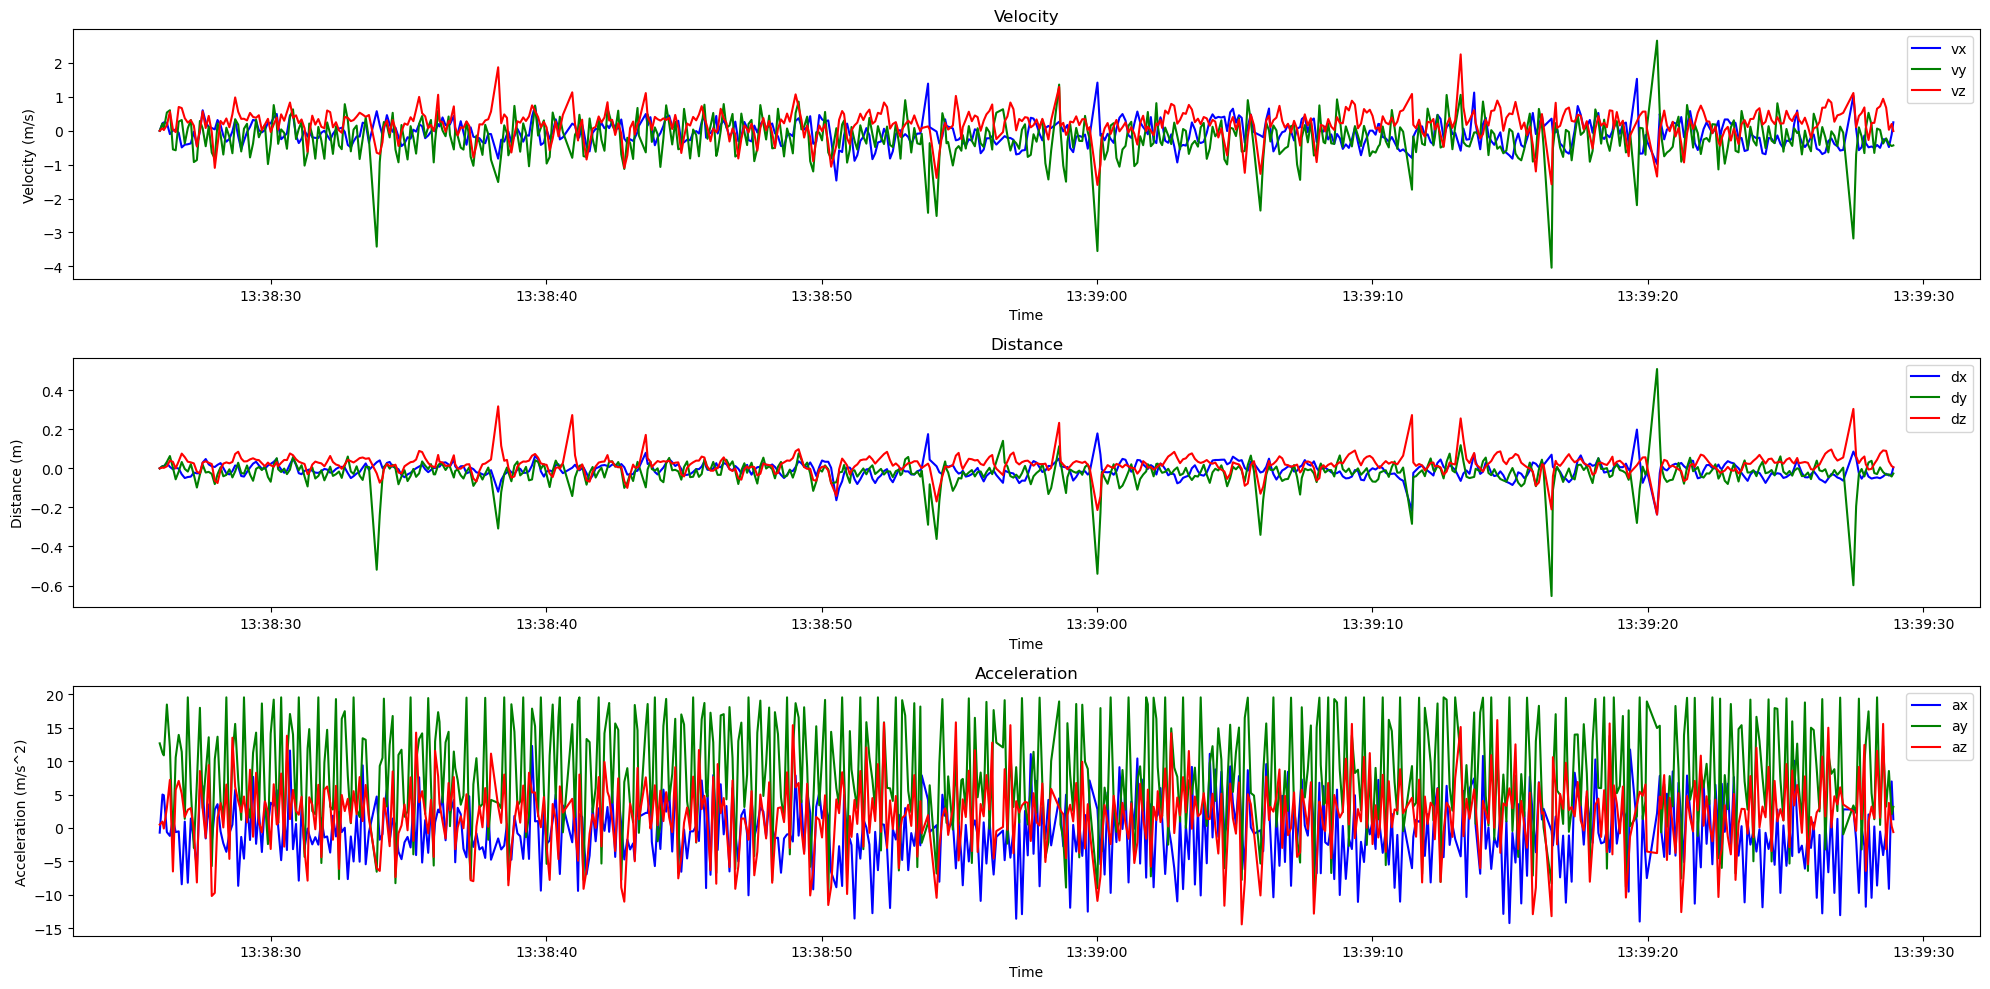

In [151]:
plot_df(tdplot)

In [155]:
tdplot_df = tdplot[['Time_secs', 'x', 'y', 'z', 'dx', 'dy', 'dz']]

In [156]:
tdplot_df

Time_secs         x          y          z        dx        dy  \
0    49105.962326 -0.694638  12.680544   0.503953  0.000000  0.000000   
1    49106.062271  5.012288  11.264028   0.953424  0.010782  0.010849   
2    49106.112167  4.903325  10.882658  -0.081722  0.011554  0.007002   
3    49106.222305 -0.612916  18.496431   3.023717  0.026634  0.033155   
4    49106.332290 -1.184970  12.108489   7.205164  0.007556  0.062896   
..            ...       ...        ...        ...       ...       ...   
588  49168.542343 -4.058864  12.299174  15.595298 -0.041608 -0.019383   
589  49168.652297 -0.531194   3.214402  -3.173541 -0.027758 -0.033035   
590  49168.752243 -9.112013   8.539958   3.759216 -0.036693 -0.030820   
591  49168.852279  6.973618   2.070293   0.272407 -0.029454 -0.042101   
592  49168.912429  1.307553   3.173541  -0.612916  0.004274 -0.026508   

           dz  
0    0.000000  
1    0.003639  
2    0.002359  
3    0.010119  
4    0.039843  
..        ...  
588  0.091545  
589  0.089376  
590  0.035590  
591  0.011550  
592  0.005757  

[593 rows x 7 columns]

In [157]:
tdplot_df.describe()

Time_secs           x           y           z          dx  \
count    593.000000  593.000000  593.000000  593.000000  593.000000   
mean   49137.297434   -0.698037    8.001529    1.829330   -0.007863   
std       18.207806    5.023549    8.214818    5.316708    0.036027   
min    49105.962326  -14.246883  -10.610250  -14.437569   -0.236537   
25%    49121.682296   -3.677494    2.070293   -1.035146   -0.027896   
50%    49137.172317   -0.531194    7.736358    1.920469   -0.007277   
75%    49152.902297    2.451662   15.595298    5.053149    0.011903   
max    49168.912429   12.299174   19.572440   16.167353    0.198377   

               dy          dz  
count  593.000000  593.000000  
mean    -0.024394    0.020723  
std      0.071427    0.047800  
min     -0.653916   -0.236477  
25%     -0.041542    0.004361  
50%     -0.016540    0.023137  
75%      0.004839    0.038811  
max      0.508458    0.317249

## Plotly

In [119]:
pip install plotly pandas

Note: you may need to restart the kernel to use updated packages.


In [158]:
tdplot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time_secs  593 non-null    float64
 1   x          593 non-null    float64
 2   y          593 non-null    float64
 3   z          593 non-null    float64
 4   dx         593 non-null    float64
 5   dy         593 non-null    float64
 6   dz         593 non-null    float64
dtypes: float64(7)
memory usage: 32.6 KB


In [159]:
tdplot_df.Time_secs[0]

49105.962326

In [160]:
import plotly.graph_objs as go
import plotly.express as px

# Assuming 'tdplot_df' is your DataFrame
fig = go.Figure(data=[go.Scatter3d(
    x=tdplot_df['dx'],
    y=tdplot_df['dy'],
    z=tdplot_df['dz'],
    mode='markers+lines',
    marker=dict(
        size=3,
        color=tdplot_df['Time_secs'],  # Set color to the time data
        colorscale='Viridis',
        colorbar=dict(title='Time')
    ),
    line=dict(
        color='darkblue',
        width=2
    )
)])

fig.update_layout(
    scene=dict(
        xaxis_title='X Displacement',
        yaxis_title='Y Displacement',
        zaxis_title='Z Displacement'
    ),
    title="3D Displacement Plot Over Time",
    width=1200,  
    height=800  
)

fig.show()


In [161]:
import plotly.graph_objs as go
import plotly.express as px

fig = go.Figure(data=[go.Scatter3d(
    x=tdplot_df['x'],
    y=tdplot_df['y'],
    z=tdplot_df['z'],
    mode='markers+lines',
    marker=dict(
        size=3,
        color=tdplot_df['Time_secs'],
        colorscale='Viridis',
        colorbar=dict(title='Time')
    ),
    line=dict(
        color='darkblue',
        width=2
    )
)])

fig.update_layout(
    scene=dict(
        xaxis_title='X Acceleration',
        yaxis_title='Y Acceleration',
        zaxis_title='Z Acceleration'
    ),
    title="3D Acceleration Plot Over Time",
    width=1200,  
    height=800  
)

fig.show()


In [165]:
import plotly.express as px

# Create the animated scatter plot using Plotly Express
fig = px.scatter(tdplot_df, x='x', y='y', animation_frame='Time_secs', 
                 color='z', size_max=60, range_x=[tdplot_df['x'].min()-0.1, tdplot_df['x'].max()+0.1], 
                 range_y=[tdplot_df['y'].min()-0.1, tdplot_df['y'].max()+0.1], 
                 labels={'x': 'X Acceleration', 'y': 'Y Acceleration', 'z': 'Z Acceleration', 'Time_secs': 'Time (s)'},
                 title="2D Animation of Acceleration Data Over Time")

# Update layout for better appearance
fig.update_layout(
    coloraxis_colorbar=dict(title='Z Acceleration'),
    width=800,
    height=600
)

fig.show()


In [167]:
import plotly.express as px

# Create the animated scatter plot using Plotly Express
fig = px.scatter(tdplot_df, x='dx', y='dy', animation_frame='Time_secs', 
                 color='dz', size_max=60, range_x=[tdplot_df['dx'].min()-0.1, tdplot_df['dx'].max()+0.1], 
                 range_y=[tdplot_df['dy'].min()-0.1, tdplot_df['dy'].max()+0.1], 
                 labels={'dx': 'X Displacement', 'dy': 'Y Displacement', 'dz': 'Z Displacement', 'Time_secs': 'Time (s)'},
                 title="2D Animation of Displacement Data Over Time")

# Update layout for better appearance
fig.update_layout(
    coloraxis_colorbar=dict(title='Z Displacement'),
    width=800,
    height=600
)

fig.show()


In [169]:
import plotly.express as px

# Create the animated scatter plot using Plotly Express
fig = px.scatter_3d(tdplot_df, x='x', y='y', z='z', animation_frame='Time_secs', 
                    color='Time_secs', size_max=60,
                    range_x=[tdplot_df['x'].min()-0.1, tdplot_df['x'].max()+0.1], 
                    range_y=[tdplot_df['y'].min()-0.1, tdplot_df['y'].max()+0.1],
                    range_z=[tdplot_df['z'].min()-0.1, tdplot_df['z'].max()+0.1],
                    labels={'x': 'X Acceleration', 'y': 'Y Acceleration', 'z': 'Z Acceleration', 'Time_secs': 'Time (s)'},
                    title="3D Animation of Acceleration Data Over Time")

# Update layout for better appearance
fig.update_layout(
    scene=dict(
        xaxis_title='X Acceleration',
        yaxis_title='Y Acceleration',
        zaxis_title='Z Acceleration',
    ),
    coloraxis_colorbar=dict(title='Time (s)'),
    width=800,
    height=600
)

fig.show()


In [ ]:
def mod_df_csv_disp(data, segment, ):
    df_1 = data[data.Segment==segment]
    df_1 = modify_df(df_1)

    plot_df(df_1)

    df_test = df_1[['DateTime', 'dx', 'dy', 'dz', 'Activity']]
    df_test.to_csv(f'{df_test.Activity}.csv', index=False)

## Extra Stuff

### EDA

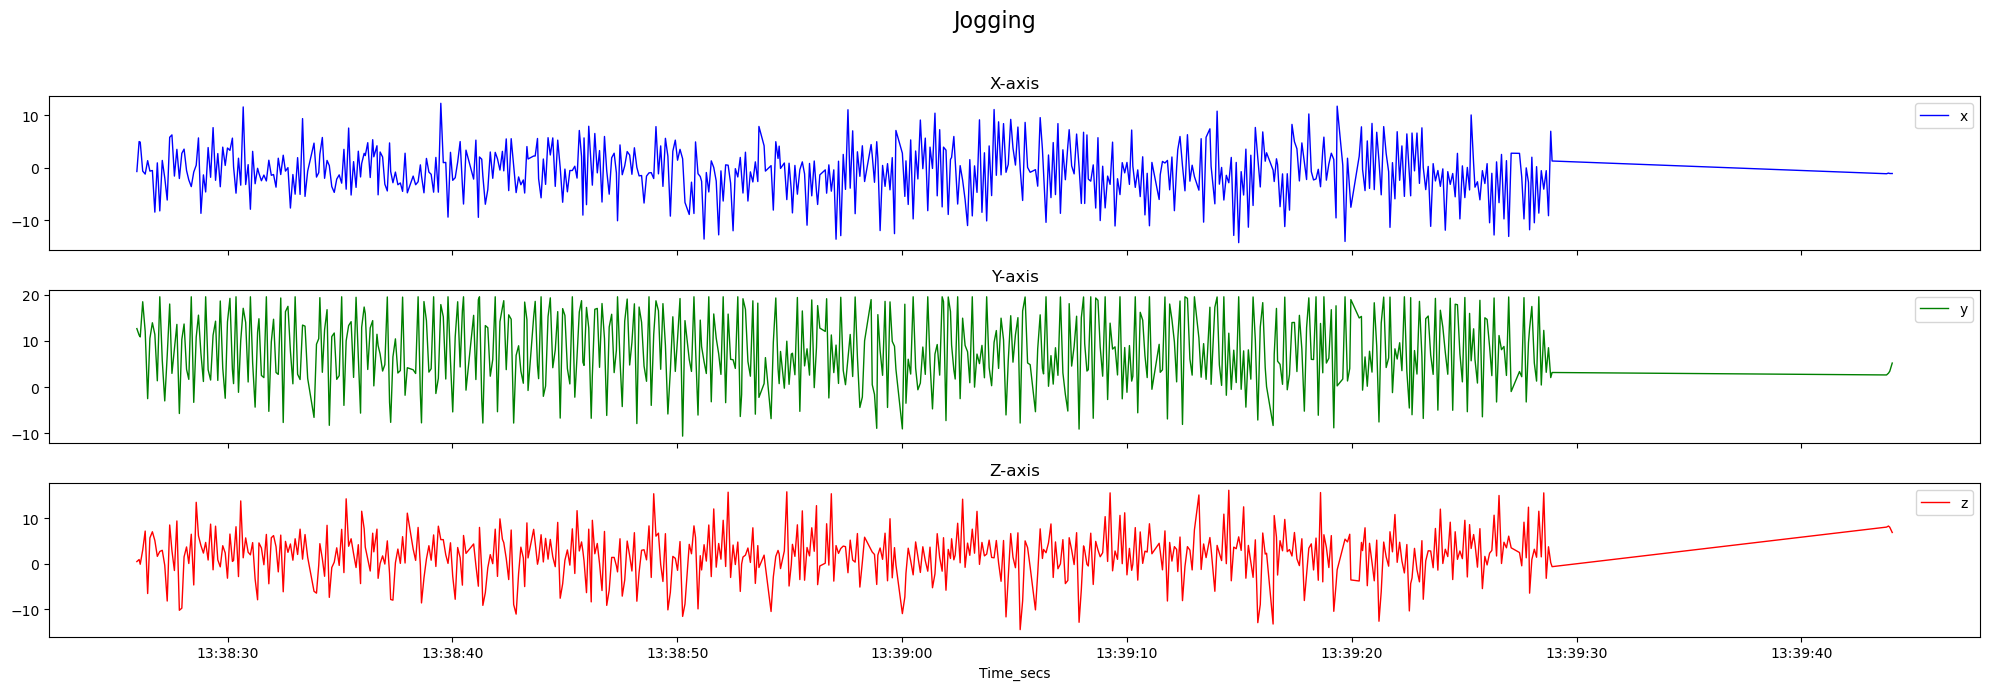

In [57]:
plot_activity("Jogging", df)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   User                     597 non-null    object        
 1   Activity                 597 non-null    object        
 2   Timestamp                597 non-null    float64       
 3   x                        597 non-null    float64       
 4   y                        597 non-null    float64       
 5   z                        597 non-null    float64       
 6   Time_secs                597 non-null    float64       
 7   Segment                  597 non-null    int32         
 8   DateTime                 597 non-null    datetime64[ns]
 9   Time                     597 non-null    object        
 10  Time_Difference          597 non-null    float64       
 11  Difference_Microseconds  596 non-null    float64       
dtypes: datetime64[ns](1), float64(7), in

In [59]:
df.describe()

Timestamp           x           y           z     Time_secs  \
count  5.970000e+02  597.000000  597.000000  597.000000    597.000000   
mean   4.913761e+13   -0.700501    7.971919    1.869547  49137.609744   
min    4.910596e+13  -14.246883  -10.610250  -14.437569  49105.962326   
25%    4.912179e+13   -3.636633    2.070293   -0.844462  49121.792312   
50%    4.913738e+13   -0.572055    7.545672    1.988571  49137.382308   
75%    4.915330e+13    2.451662   15.554437    5.134871  49153.302322   
max    4.918404e+13   12.299174   19.572440   16.167353  49184.042312   
std    1.854140e+10    5.006755    8.195551    5.321645     18.541399   

       Segment                       DateTime  Time_Difference  \
count    597.0                            597     5.970000e+02   
mean       1.0  1970-01-01 13:38:57.609743979     3.164742e+07   
min        1.0     1970-01-01 13:38:25.962326     0.000000e+00   
25%        1.0     1970-01-01 13:38:41.792312     1.582999e+07   
50%        1.0     1970-01-01 13:38:57.382308     3.141998e+07   
75%        1.0     1970-01-01 13:39:13.302322     4.734000e+07   
max        1.0     1970-01-01 13:39:44.042312     7.807999e+07   
std        0.0                            NaN     1.854140e+07   

       Difference_Microseconds  
count             5.960000e+02  
mean              1.310067e+05  
min               4.773000e+04  
25%               9.997600e+04  
50%               1.099850e+05  
75%               1.100160e+05  
max               1.487711e+07  
std               6.060408e+05

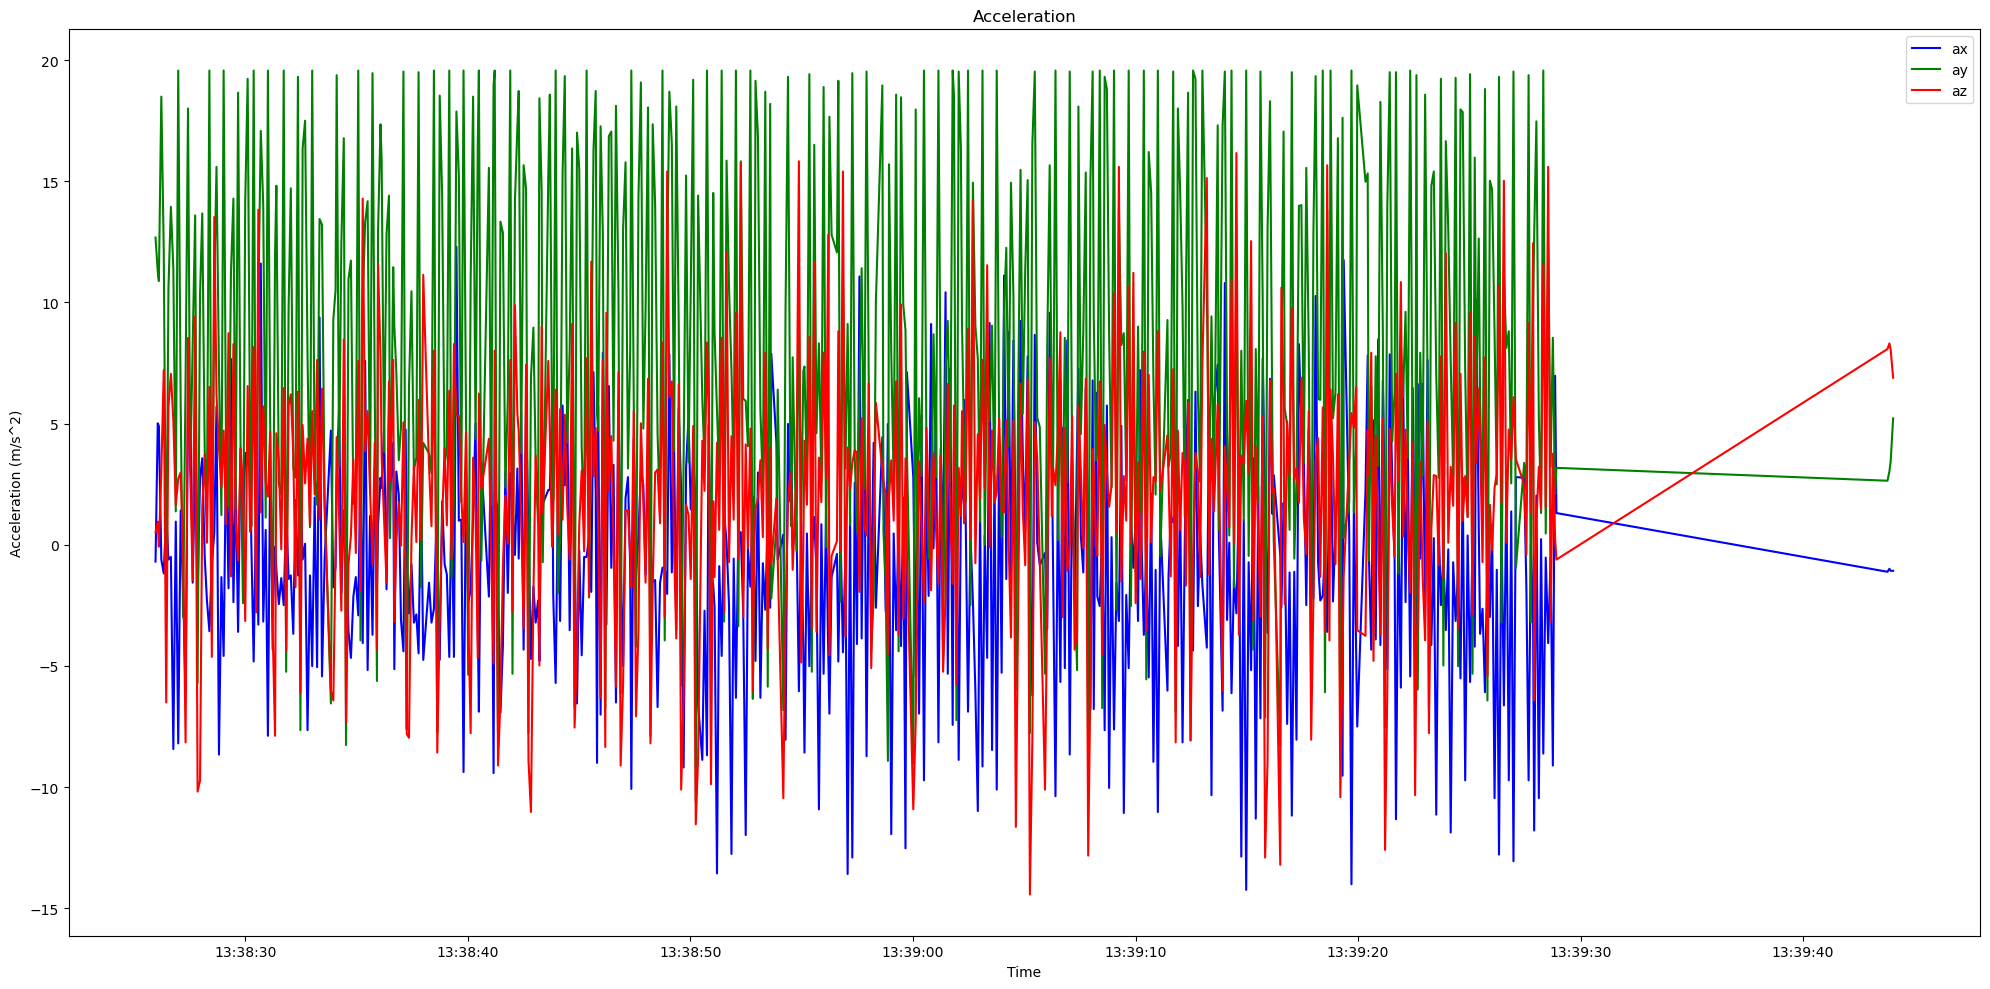

In [60]:
plt.figure(figsize=(20, 10))

plt.plot(df['DateTime'], df['x'], label='ax', color='blue')
plt.plot(df['DateTime'], df['y'], label='ay', color='green')
plt.plot(df['DateTime'], df['z'], label='az', color='red')
plt.title('Acceleration')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()

plt.tight_layout()
plt.show()

In [61]:
df1 = df.copy()

In [62]:
# # Convert timestamps to seconds relative to the first timestamp
# # df['Time_secs'] = (df['Time'] - df['Time'].iloc[0]).dt.total_seconds()

# # Calculate velocity by integrating acceleration
# # Initialize velocity
# df['vx'] = 0
# df['vy'] = 0
# df['vz'] = 0

# for i in range(1, len(df)):
#     dt = df['Difference_Microseconds'].iloc[i] / 1000000
#     df.loc[i, 'vx'] = df.loc[i - 1, 'vx'] + df.loc[i, 'x'] * dt
#     df.loc[i, 'vy'] = df.loc[i - 1, 'vy'] + (df.loc[i, 'y']) * dt
#     df.loc[i, 'vz'] = df.loc[i - 1, 'vz'] + df.loc[i, 'z'] * dt

# # Calculate distance by integrating velocity
# # Initialize distance
# df['dx'] = 0
# df['dy'] = 0
# df['dz'] = 0

# for i in range(1, len(df)):
#     dt = df['Difference_Microseconds'].iloc[i] / 1000000
#     df.loc[i, 'dx'] = df.loc[i - 1, 'dx'] + df.loc[i, 'vx'] * dt
#     df.loc[i, 'dy'] = df.loc[i - 1, 'dy'] + df.loc[i, 'vy'] * dt
#     df.loc[i, 'dz'] = df.loc[i - 1, 'dz'] + df.loc[i, 'vz'] * dt

# # Plot results
# plt.figure(figsize=(20, 10))

# # Plot velocity
# plt.subplot(3, 1, 1)
# plt.plot(df['DateTime'], df['vx'], label='vx', color='blue')
# plt.plot(df['DateTime'], df['vy'], label='vy', color='green')
# plt.plot(df['DateTime'], df['vz'], label='vz', color='red')
# plt.title('Velocity')
# plt.xlabel('Time')
# plt.ylabel('Velocity (m/s)')
# plt.legend()

# # Plot distance
# plt.subplot(3, 1, 2)
# plt.plot(df['DateTime'], df['dx'], label='dx', color='blue')
# plt.plot(df['DateTime'], df['dy'], label='dy', color='green')
# plt.plot(df['DateTime'], df['dz'], label='dz', color='red')
# plt.title('Distance')
# plt.xlabel('Time')
# plt.ylabel('Distance (m)')
# plt.legend()

# # Plot acceleration
# plt.subplot(3, 1, 3)
# plt.plot(df['DateTime'], df['x'], label='ax', color='blue')
# plt.plot(df['DateTime'], df['y'], label='ay', color='green')
# plt.plot(df['DateTime'], df['z'], label='az', color='red')
# plt.title('Acceleration')
# plt.xlabel('Time')
# plt.ylabel('Acceleration (m/s^2)')
# plt.legend()

# plt.tight_layout()
# plt.show()

In [63]:
df

User Activity     Timestamp         x          y         z     Time_secs  \
0     33  Jogging  4.910596e+13 -0.694638  12.680544  0.503953  49105.962326   
1     33  Jogging  4.910606e+13  5.012288  11.264028  0.953424  49106.062271   
2     33  Jogging  4.910611e+13  4.903325  10.882658 -0.081722  49106.112167   
3     33  Jogging  4.910622e+13 -0.612916  18.496431  3.023717  49106.222305   
4     33  Jogging  4.910633e+13 -1.184970  12.108489  7.205164  49106.332290   
..   ...      ...           ...       ...        ...       ...           ...   
592   33  Jogging  4.916891e+13  1.307553   3.173541 -0.612916  49168.912429   
593   33  Jogging  4.918379e+13 -1.116869   2.642348  8.076866  49183.789535   
594   33  Jogging  4.918387e+13 -0.994285   3.023717  8.308413  49183.874710   
595   33  Jogging  4.918393e+13 -1.076008   3.445948  8.049625  49183.932357   
596   33  Jogging  4.918404e+13 -1.076008   5.216593  6.891896  49184.042312   

     Segment                   DateTime             Time  Time_Difference  \
0          1 1970-01-01 13:38:25.962326  13:38:25.962326              0.0   
1          1 1970-01-01 13:38:26.062271  13:38:26.062271          99945.0   
2          1 1970-01-01 13:38:26.112167  13:38:26.112167         149841.0   
3          1 1970-01-01 13:38:26.222305  13:38:26.222305         259979.0   
4          1 1970-01-01 13:38:26.332290  13:38:26.332290         369964.0   
..       ...                        ...              ...              ...   
592        1 1970-01-01 13:39:28.912429  13:39:28.912429       62950103.0   
593        1 1970-01-01 13:39:43.789535  13:39:43.789535       77827209.0   
594        1 1970-01-01 13:39:43.874710  13:39:43.874710       77912384.0   
595        1 1970-01-01 13:39:43.932357  13:39:43.932357       77970031.0   
596        1 1970-01-01 13:39:44.042312  13:39:44.042312       78079986.0   

     Difference_Microseconds  
0                        NaN  
1                    99945.0  
2                    49896.0  
3                   110138.0  
4                   109985.0  
..                       ...  
592                  60150.0  
593               14877106.0  
594                  85175.0  
595                  57647.0  
596                 109955.0  

[597 rows x 12 columns]

In [64]:
# (df['DateTime'].iloc[i] - df['DateTime'].iloc[0]).total_seconds()* 1_000_000

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   User                     597 non-null    object        
 1   Activity                 597 non-null    object        
 2   Timestamp                597 non-null    float64       
 3   x                        597 non-null    float64       
 4   y                        597 non-null    float64       
 5   z                        597 non-null    float64       
 6   Time_secs                597 non-null    float64       
 7   Segment                  597 non-null    int32         
 8   DateTime                 597 non-null    datetime64[ns]
 9   Time                     597 non-null    object        
 10  Time_Difference          597 non-null    float64       
 11  Difference_Microseconds  596 non-null    float64       
dtypes: datetime64[ns](1), float64(7), in

In [66]:
df_test = df[['DateTime', 'x', 'y', 'z']]

In [67]:
df_test

DateTime         x          y         z
0   1970-01-01 13:38:25.962326 -0.694638  12.680544  0.503953
1   1970-01-01 13:38:26.062271  5.012288  11.264028  0.953424
2   1970-01-01 13:38:26.112167  4.903325  10.882658 -0.081722
3   1970-01-01 13:38:26.222305 -0.612916  18.496431  3.023717
4   1970-01-01 13:38:26.332290 -1.184970  12.108489  7.205164
..                         ...       ...        ...       ...
592 1970-01-01 13:39:28.912429  1.307553   3.173541 -0.612916
593 1970-01-01 13:39:43.789535 -1.116869   2.642348  8.076866
594 1970-01-01 13:39:43.874710 -0.994285   3.023717  8.308413
595 1970-01-01 13:39:43.932357 -1.076008   3.445948  8.049625
596 1970-01-01 13:39:44.042312 -1.076008   5.216593  6.891896

[597 rows x 4 columns]

In [68]:
# df_test.to_csv('jogging.csv', index=False)

In [69]:
# df.to_csv('jogging_sample.csv', index=False)

In [70]:
df1

User Activity     Timestamp         x          y         z     Time_secs  \
0     33  Jogging  4.910596e+13 -0.694638  12.680544  0.503953  49105.962326   
1     33  Jogging  4.910606e+13  5.012288  11.264028  0.953424  49106.062271   
2     33  Jogging  4.910611e+13  4.903325  10.882658 -0.081722  49106.112167   
3     33  Jogging  4.910622e+13 -0.612916  18.496431  3.023717  49106.222305   
4     33  Jogging  4.910633e+13 -1.184970  12.108489  7.205164  49106.332290   
..   ...      ...           ...       ...        ...       ...           ...   
592   33  Jogging  4.916891e+13  1.307553   3.173541 -0.612916  49168.912429   
593   33  Jogging  4.918379e+13 -1.116869   2.642348  8.076866  49183.789535   
594   33  Jogging  4.918387e+13 -0.994285   3.023717  8.308413  49183.874710   
595   33  Jogging  4.918393e+13 -1.076008   3.445948  8.049625  49183.932357   
596   33  Jogging  4.918404e+13 -1.076008   5.216593  6.891896  49184.042312   

     Segment                   DateTime             Time  Time_Difference  \
0          1 1970-01-01 13:38:25.962326  13:38:25.962326              0.0   
1          1 1970-01-01 13:38:26.062271  13:38:26.062271          99945.0   
2          1 1970-01-01 13:38:26.112167  13:38:26.112167         149841.0   
3          1 1970-01-01 13:38:26.222305  13:38:26.222305         259979.0   
4          1 1970-01-01 13:38:26.332290  13:38:26.332290         369964.0   
..       ...                        ...              ...              ...   
592        1 1970-01-01 13:39:28.912429  13:39:28.912429       62950103.0   
593        1 1970-01-01 13:39:43.789535  13:39:43.789535       77827209.0   
594        1 1970-01-01 13:39:43.874710  13:39:43.874710       77912384.0   
595        1 1970-01-01 13:39:43.932357  13:39:43.932357       77970031.0   
596        1 1970-01-01 13:39:44.042312  13:39:44.042312       78079986.0   

     Difference_Microseconds  
0                        NaN  
1                    99945.0  
2                    49896.0  
3                   110138.0  
4                   109985.0  
..                       ...  
592                  60150.0  
593               14877106.0  
594                  85175.0  
595                  57647.0  
596                 109955.0  

[597 rows x 12 columns]

C:\Users\koust\AppData\Local\Temp\ipykernel_32404\270287884.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.21576377961675' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[i, 'vx'] =  df1.loc[i - 1, 'vx'] + 0.5 * (df1.loc[i - 1, 'x'] + df1.loc[i, 'x']) * dt
C:\Users\koust\AppData\Local\Temp\ipykernel_32404\270287884.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2171091242699999' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[i, 'vy'] =  df1.loc[i - 1, 'vy'] + 0.5 * (df1.loc[i - 1, 'y'] - 9.8 + df1.loc[i, 'y'] - 9.8) * dt
C:\Users\koust\AppData\Local\Temp\ipykernel_32404\270287884.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Val

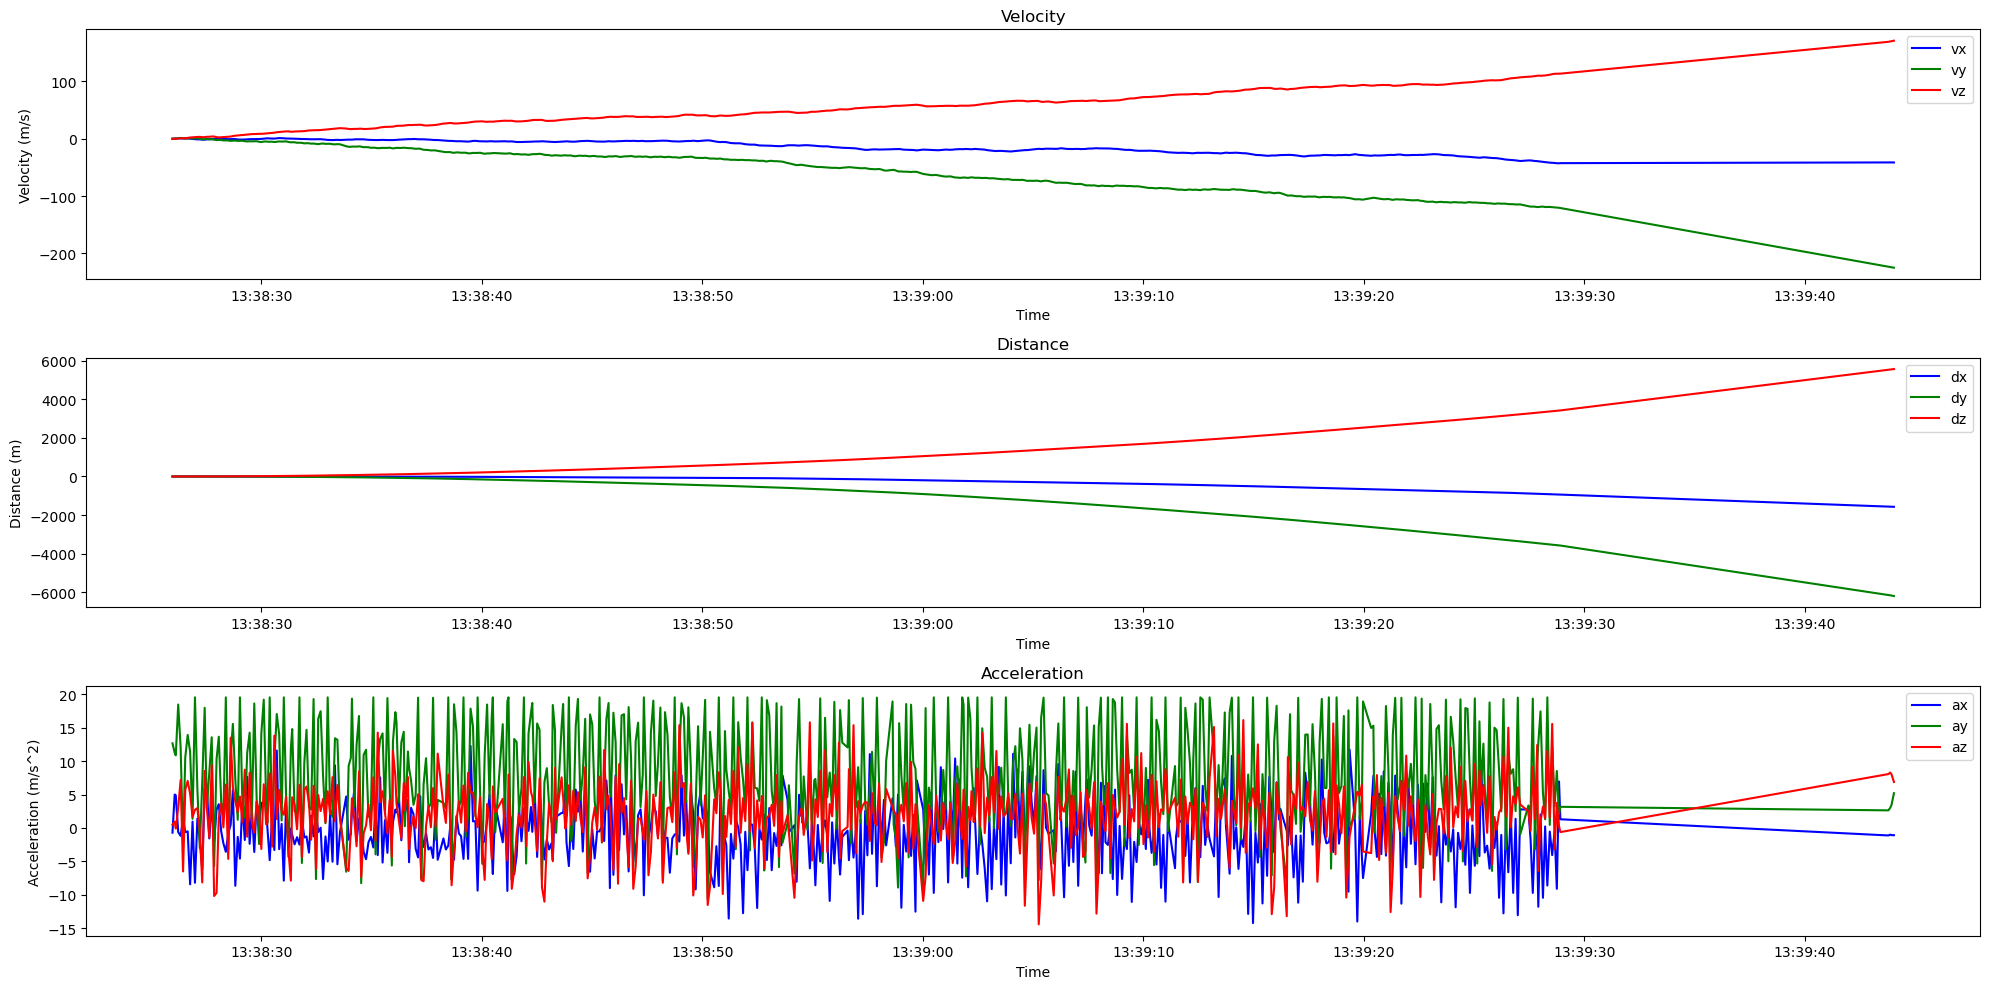

In [72]:
# Convert timestamps to seconds relative to the first timestamp
# df1['Time_secs'] = (df1['Time'] - df1['Time'].iloc[0]).dt.total_seconds()

# Calculate velocity by integrating acceleration
# Initialize velocity
df1['vx'] = 0
df1['vy'] = 0
df1['vz'] = 0

for i in range(1, len(df1)):
    dt = df1['Difference_Microseconds'].iloc[i] / 1000000
    #df1.loc[i, 'vx'] =  0.5 * (df1.loc[i - 1, 'x'] + df1.loc[i, 'x']) * dt
    #df1.loc[i, 'vy'] =  0.5 * (df1.loc[i - 1, 'y'] - 9.8 + df1.loc[i, 'y'] - 9.8) * dt
    #df1.loc[i, 'vz'] =  0.5 * (df1.loc[i - 1, 'z'] + df1.loc[i, 'z']) * dt
    df1.loc[i, 'vx'] =  df1.loc[i - 1, 'vx'] + 0.5 * (df1.loc[i - 1, 'x'] + df1.loc[i, 'x']) * dt
    df1.loc[i, 'vy'] =  df1.loc[i - 1, 'vy'] + 0.5 * (df1.loc[i - 1, 'y'] - 9.8 + df1.loc[i, 'y'] - 9.8) * dt
    df1.loc[i, 'vz'] =  df1.loc[i - 1, 'vz'] + 0.5 * (df1.loc[i - 1, 'z'] + df1.loc[i, 'z']) * dt

# Calculate distance by integrating velocity
# Initialize distance
df1['dx'] = 0
df1['dy'] = 0
df1['dz'] = 0

for i in range(1, len(df1)):
    dt = df1['Difference_Microseconds'].iloc[i] / 1000000
    #df1.loc[i, 'dx'] =  0.5 * (df1.loc[i - 1, 'vx'] + df1.loc[i, 'vx']) * dt
    #df1.loc[i, 'dy'] =  0.5 * (df1.loc[i - 1, 'vy'] + df1.loc[i, 'vy']) * dt
    #df1.loc[i, 'dz'] =  0.5 * (df1.loc[i - 1, 'vz'] + df1.loc[i, 'vz']) * dt
    df1.loc[i, 'dx'] =  df1.loc[i - 1, 'dx'] + 0.5 * (df1.loc[i - 1, 'vx'] + df1.loc[i, 'vx']) * dt
    df1.loc[i, 'dy'] =  df1.loc[i - 1, 'dy'] + 0.5 * (df1.loc[i - 1, 'vy'] + df1.loc[i, 'vy']) * dt
    df1.loc[i, 'dz'] =  df1.loc[i - 1, 'dz'] + 0.5 * (df1.loc[i - 1, 'vz'] + df1.loc[i, 'vz']) * dt

# Plot results
plt.figure(figsize=(20, 10))

# Plot velocity
plt.subplot(3, 1, 1)
plt.plot(df1['DateTime'], df1['vx'], label='vx', color='blue')
plt.plot(df1['DateTime'], df1['vy'], label='vy', color='green')
plt.plot(df1['DateTime'], df1['vz'], label='vz', color='red')
plt.title('Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.legend()

# Plot distance
plt.subplot(3, 1, 2)
plt.plot(df1['DateTime'], df1['dx'], label='dx', color='blue')
plt.plot(df1['DateTime'], df1['dy'], label='dy', color='green')
plt.plot(df1['DateTime'], df1['dz'], label='dz', color='red')
plt.title('Distance')
plt.xlabel('Time')
plt.ylabel('Distance (m)')
plt.legend()

# Plot acceleration
plt.subplot(3, 1, 3)
plt.plot(df1['DateTime'], df1['x'], label='ax', color='blue')
plt.plot(df1['DateTime'], df1['y'], label='ay', color='green')
plt.plot(df1['DateTime'], df1['z'], label='az', color='red')
plt.title('Acceleration')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()

plt.tight_layout()
plt.show()

In [73]:
df1

User Activity     Timestamp         x          y         z     Time_secs  \
0     33  Jogging  4.910596e+13 -0.694638  12.680544  0.503953  49105.962326   
1     33  Jogging  4.910606e+13  5.012288  11.264028  0.953424  49106.062271   
2     33  Jogging  4.910611e+13  4.903325  10.882658 -0.081722  49106.112167   
3     33  Jogging  4.910622e+13 -0.612916  18.496431  3.023717  49106.222305   
4     33  Jogging  4.910633e+13 -1.184970  12.108489  7.205164  49106.332290   
..   ...      ...           ...       ...        ...       ...           ...   
592   33  Jogging  4.916891e+13  1.307553   3.173541 -0.612916  49168.912429   
593   33  Jogging  4.918379e+13 -1.116869   2.642348  8.076866  49183.789535   
594   33  Jogging  4.918387e+13 -0.994285   3.023717  8.308413  49183.874710   
595   33  Jogging  4.918393e+13 -1.076008   3.445948  8.049625  49183.932357   
596   33  Jogging  4.918404e+13 -1.076008   5.216593  6.891896  49184.042312   

     Segment                   DateTime             Time  Time_Difference  \
0          1 1970-01-01 13:38:25.962326  13:38:25.962326              0.0   
1          1 1970-01-01 13:38:26.062271  13:38:26.062271          99945.0   
2          1 1970-01-01 13:38:26.112167  13:38:26.112167         149841.0   
3          1 1970-01-01 13:38:26.222305  13:38:26.222305         259979.0   
4          1 1970-01-01 13:38:26.332290  13:38:26.332290         369964.0   
..       ...                        ...              ...              ...   
592        1 1970-01-01 13:39:28.912429  13:39:28.912429       62950103.0   
593        1 1970-01-01 13:39:43.789535  13:39:43.789535       77827209.0   
594        1 1970-01-01 13:39:43.874710  13:39:43.874710       77912384.0   
595        1 1970-01-01 13:39:43.932357  13:39:43.932357       77970031.0   
596        1 1970-01-01 13:39:44.042312  13:39:44.042312       78079986.0   

     Difference_Microseconds         vx          vy          vz           dx  \
0                        NaN   0.000000    0.000000    0.000000     0.000000   
1                    99945.0   0.215764    0.217109    0.072829     0.010782   
2                    49896.0   0.463138    0.280644    0.094576     0.027720   
3                   110138.0   0.699407    0.819168    0.256589     0.091740   
4                   109985.0   0.600537    1.424357    0.819100     0.163227   
..                       ...        ...         ...         ...          ...   
592                  60150.0 -42.547583 -120.829414  113.569788  -937.756299   
593               14877106.0 -41.129163 -223.363257  169.090778 -1560.190213   
594                  85175.0 -41.219072 -223.956668  169.788586 -1563.697218   
595                  57647.0 -41.278745 -224.335131  170.260082 -1566.075094   
596                 109955.0 -41.397058 -224.936445  171.081530 -1570.620403   

              dy           dz  
0       0.000000     0.000000  
1       0.010849     0.003639  
2       0.023267     0.007816  
3       0.083833     0.027154  
4       0.207210     0.086309  
..           ...          ...  
592 -3577.586873  3423.749702  
593 -6137.882296  5526.335307  
594 -6156.932534  5540.767332  
595 -6169.853872  5550.568725  
596 -6194.553700  5569.334833  

[597 rows x 18 columns]

In [171]:
plot_df(df1)

NameError: name 'df1' is not defined

In [ ]:
def mod_df_csv_disp(data, segment, ):
    df_1 = data[data.Segment==segment]
    df_1 = modify_df(df_1)

    plot_df(df_1)

    df_test = df_1[['DateTime', 'dx', 'dy', 'dz', 'Activity']]
    df_test.to_csv(f'{df_test.Activity}.csv', index=False)

In [172]:
df_jog = data1[data1.Segment==1]

df_jog = modify_df(df_jog)

C:\Users\koust\AppData\Local\Temp\ipykernel_50944\3844256783.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\koust\AppData\Local\Temp\ipykernel_50944\3844256783.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



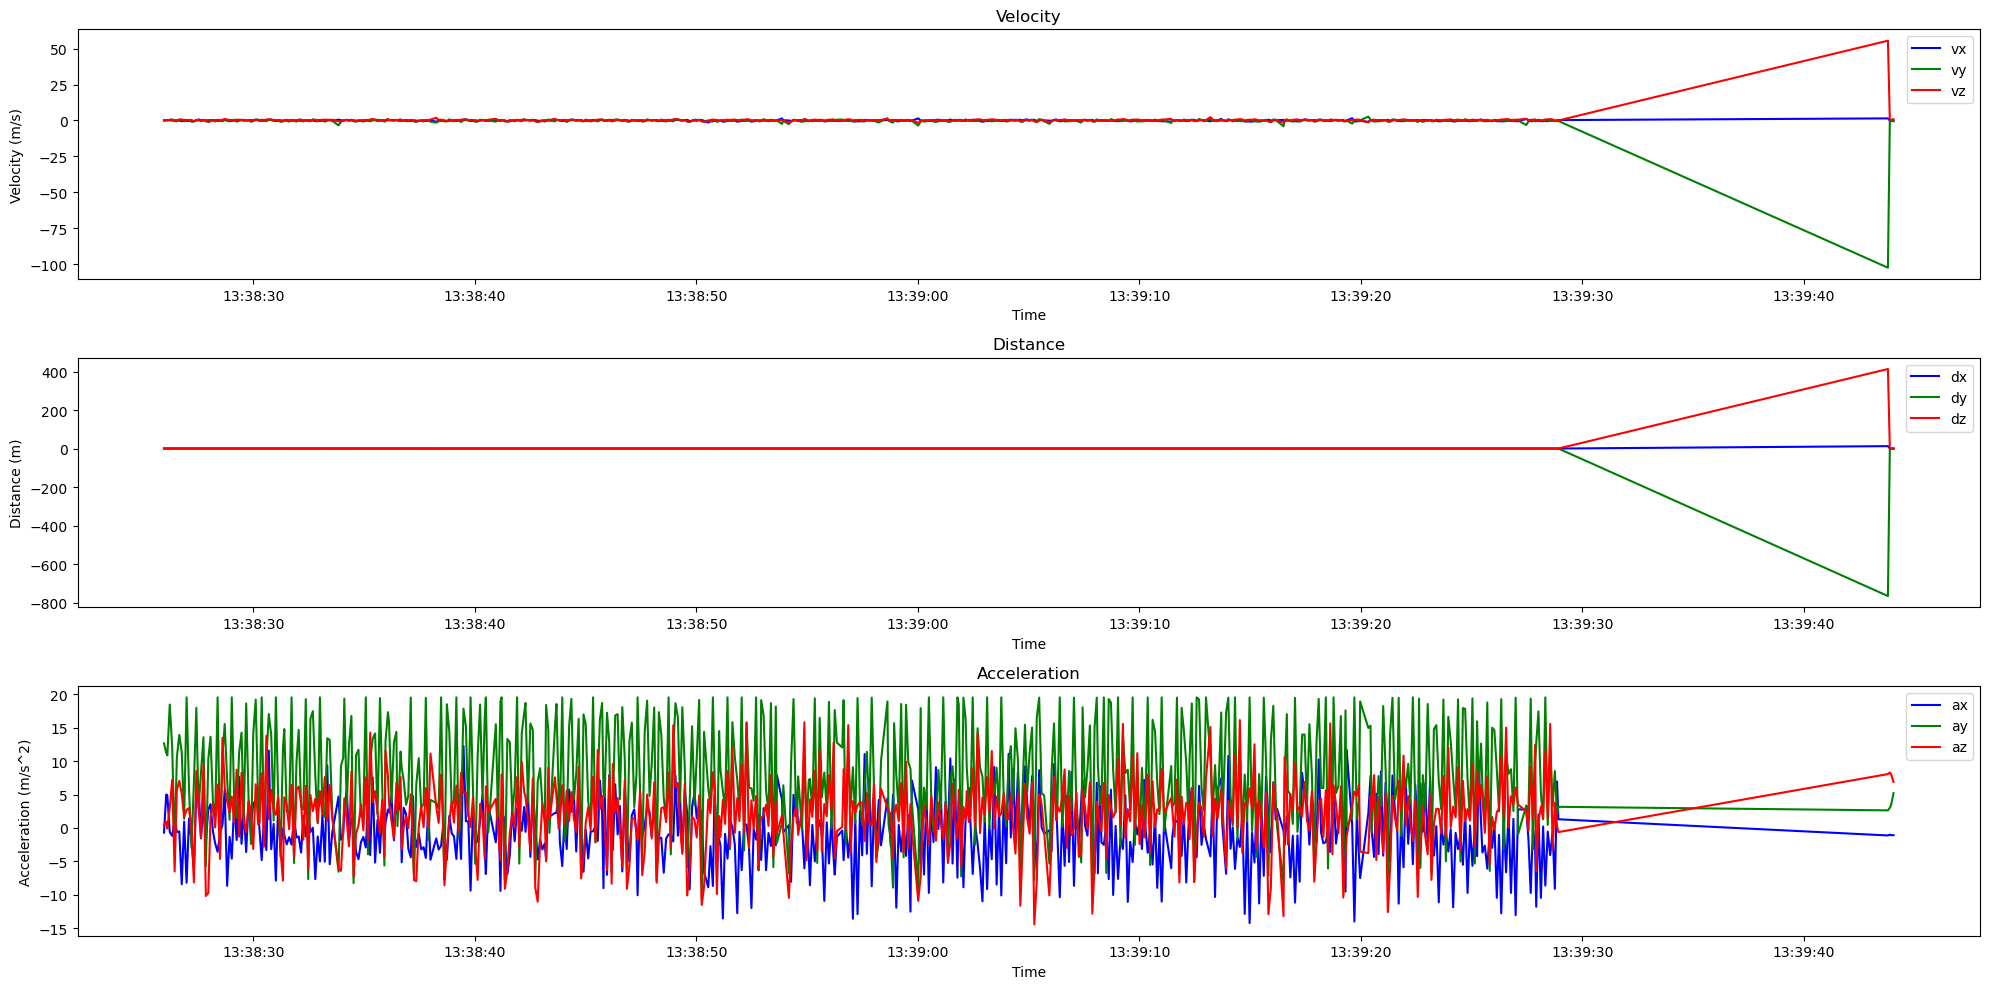

In [173]:
plot_df(df_jog)

In [ ]:
df_test = df_jog[['DateTime', 'dx', 'dy', 'dz']]
df_test.to_csv('jogging_inst.csv', index=False)

In [91]:
df_walk = data1[data1.Segment==2]

In [92]:
df_walk

User Activity     Timestamp         x          y         z     Time_secs  \
597    33  Walking  4.939499e+13  0.844462   8.008764  2.792171  49394.992294   
598    33  Walking  4.939510e+13  1.116869   8.621680  3.786457  49395.102310   
599    33  Walking  4.939520e+13 -0.503953  16.657684  1.307553  49395.202316   
600    33  Walking  4.939530e+13  4.794363  10.760075 -1.184970  49395.302292   
601    33  Walking  4.939541e+13 -0.040861   9.234595 -0.694638  49395.412338   
...   ...      ...           ...       ...        ...       ...           ...   
1156   33  Walking  4.945412e+13  4.018002   4.140586 -5.706926  49454.122268   
1157   33  Walking  4.945422e+13 -1.797886   6.319841 -0.503953  49454.222275   
1158   33  Walking  4.947494e+13 -1.334794   5.434519  6.469665  49474.936722   
1159   33  Walking  4.947501e+13 -1.225831   5.516241  6.442424  49475.010269   
1160   33  Walking  4.947507e+13 -0.721878   5.134871  6.782933  49475.072342   

      Segment                   DateTime             Time  
597         2 1970-01-01 13:43:14.992294  13:43:14.992294  
598         2 1970-01-01 13:43:15.102310  13:43:15.102310  
599         2 1970-01-01 13:43:15.202316  13:43:15.202316  
600         2 1970-01-01 13:43:15.302292  13:43:15.302292  
601         2 1970-01-01 13:43:15.412338  13:43:15.412338  
...       ...                        ...              ...  
1156        2 1970-01-01 13:44:14.122268  13:44:14.122268  
1157        2 1970-01-01 13:44:14.222275  13:44:14.222275  
1158        2 1970-01-01 13:44:34.936722  13:44:34.936722  
1159        2 1970-01-01 13:44:35.010269  13:44:35.010269  
1160        2 1970-01-01 13:44:35.072342  13:44:35.072342  

[564 rows x 10 columns]

In [93]:
len(df_walk)

564

In [95]:
df_walk = modify_df(df_walk)

C:\Users\koust\AppData\Local\Temp\ipykernel_32404\666625266.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_Difference'] = time_differences
C:\Users\koust\AppData\Local\Temp\ipykernel_32404\666625266.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Difference_Microseconds'] = df['Time_Difference'].diff()
C:\Users\koust\AppData\Local\Temp\ipykernel_32404\666625266.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pand

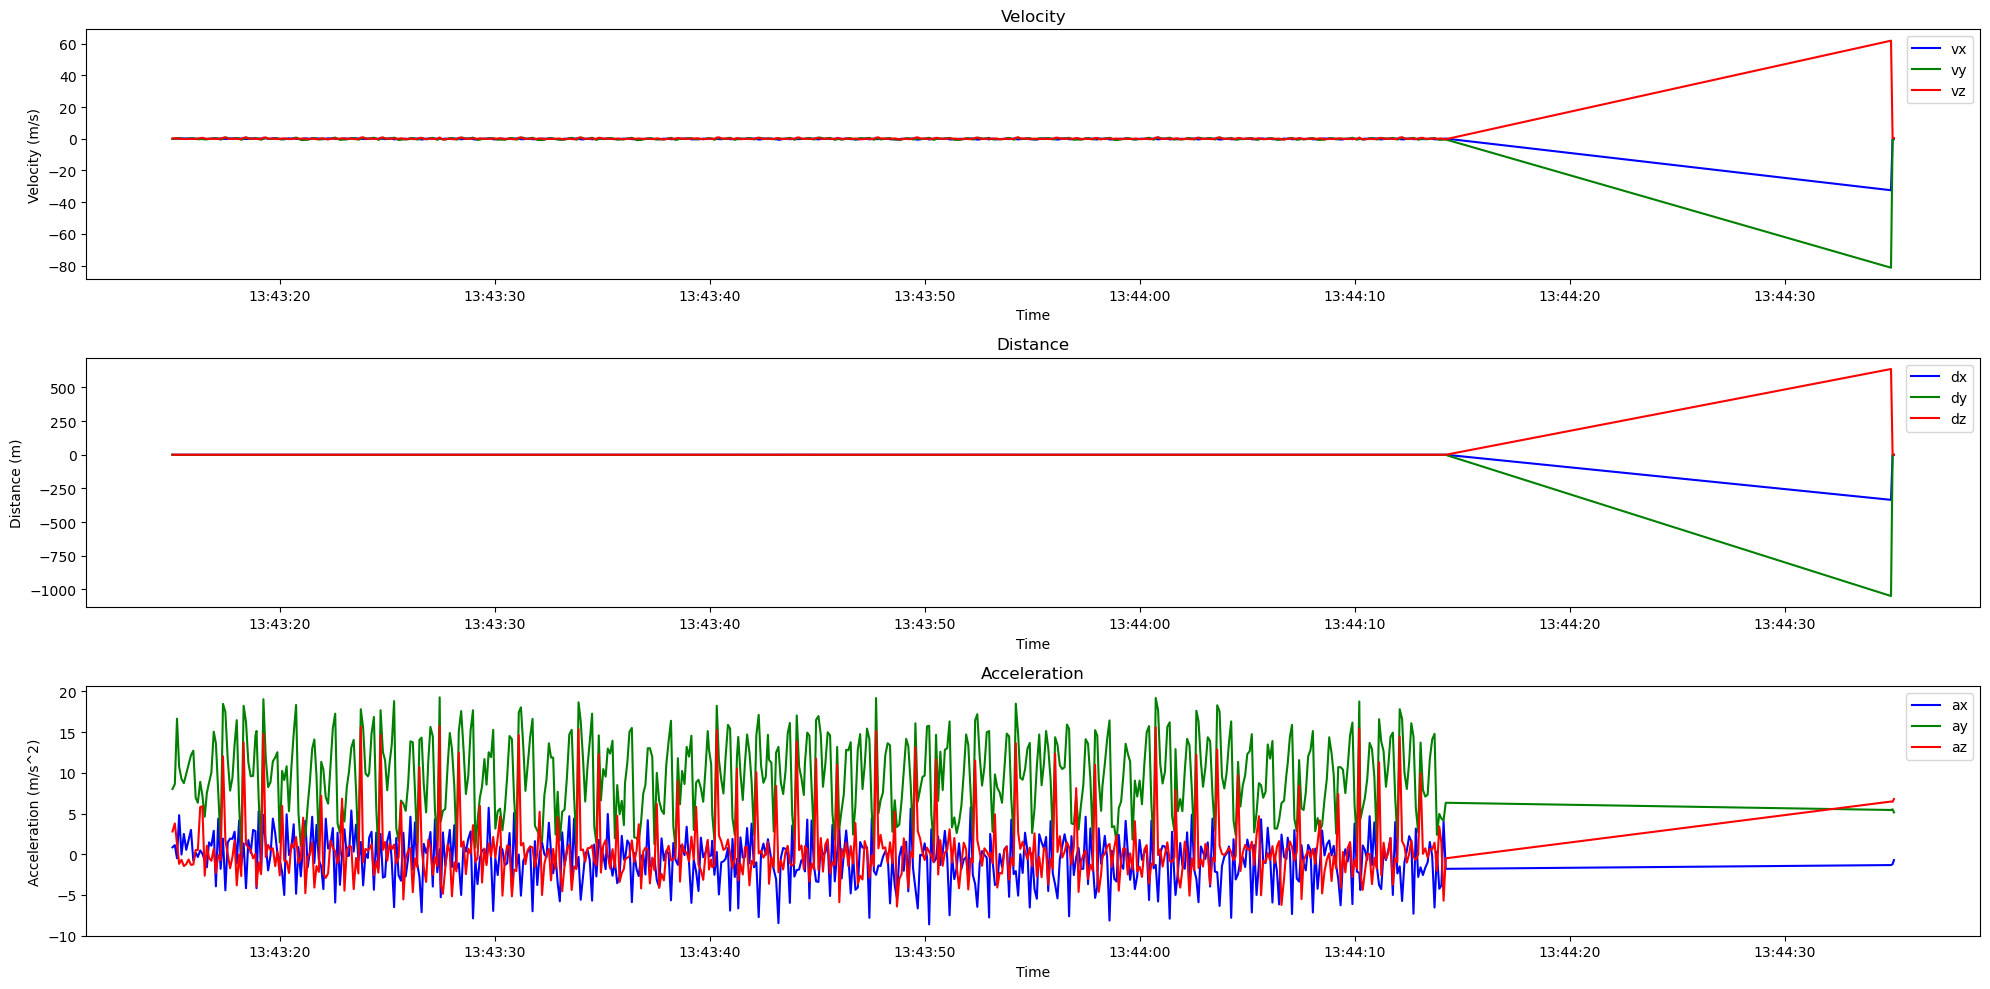

In [96]:
plot_df(df_walk)

In [97]:
df_test = df_walk[['DateTime', 'dx', 'dy', 'dz']]
df_test.to_csv('walking.csv', index=False)

In [98]:
df_upstairs = data1[data1.Segment==3]

In [99]:
df_upstairs = modify_df(df_upstairs)

C:\Users\koust\AppData\Local\Temp\ipykernel_32404\666625266.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_Difference'] = time_differences
C:\Users\koust\AppData\Local\Temp\ipykernel_32404\666625266.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Difference_Microseconds'] = df['Time_Difference'].diff()
C:\Users\koust\AppData\Local\Temp\ipykernel_32404\666625266.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pand

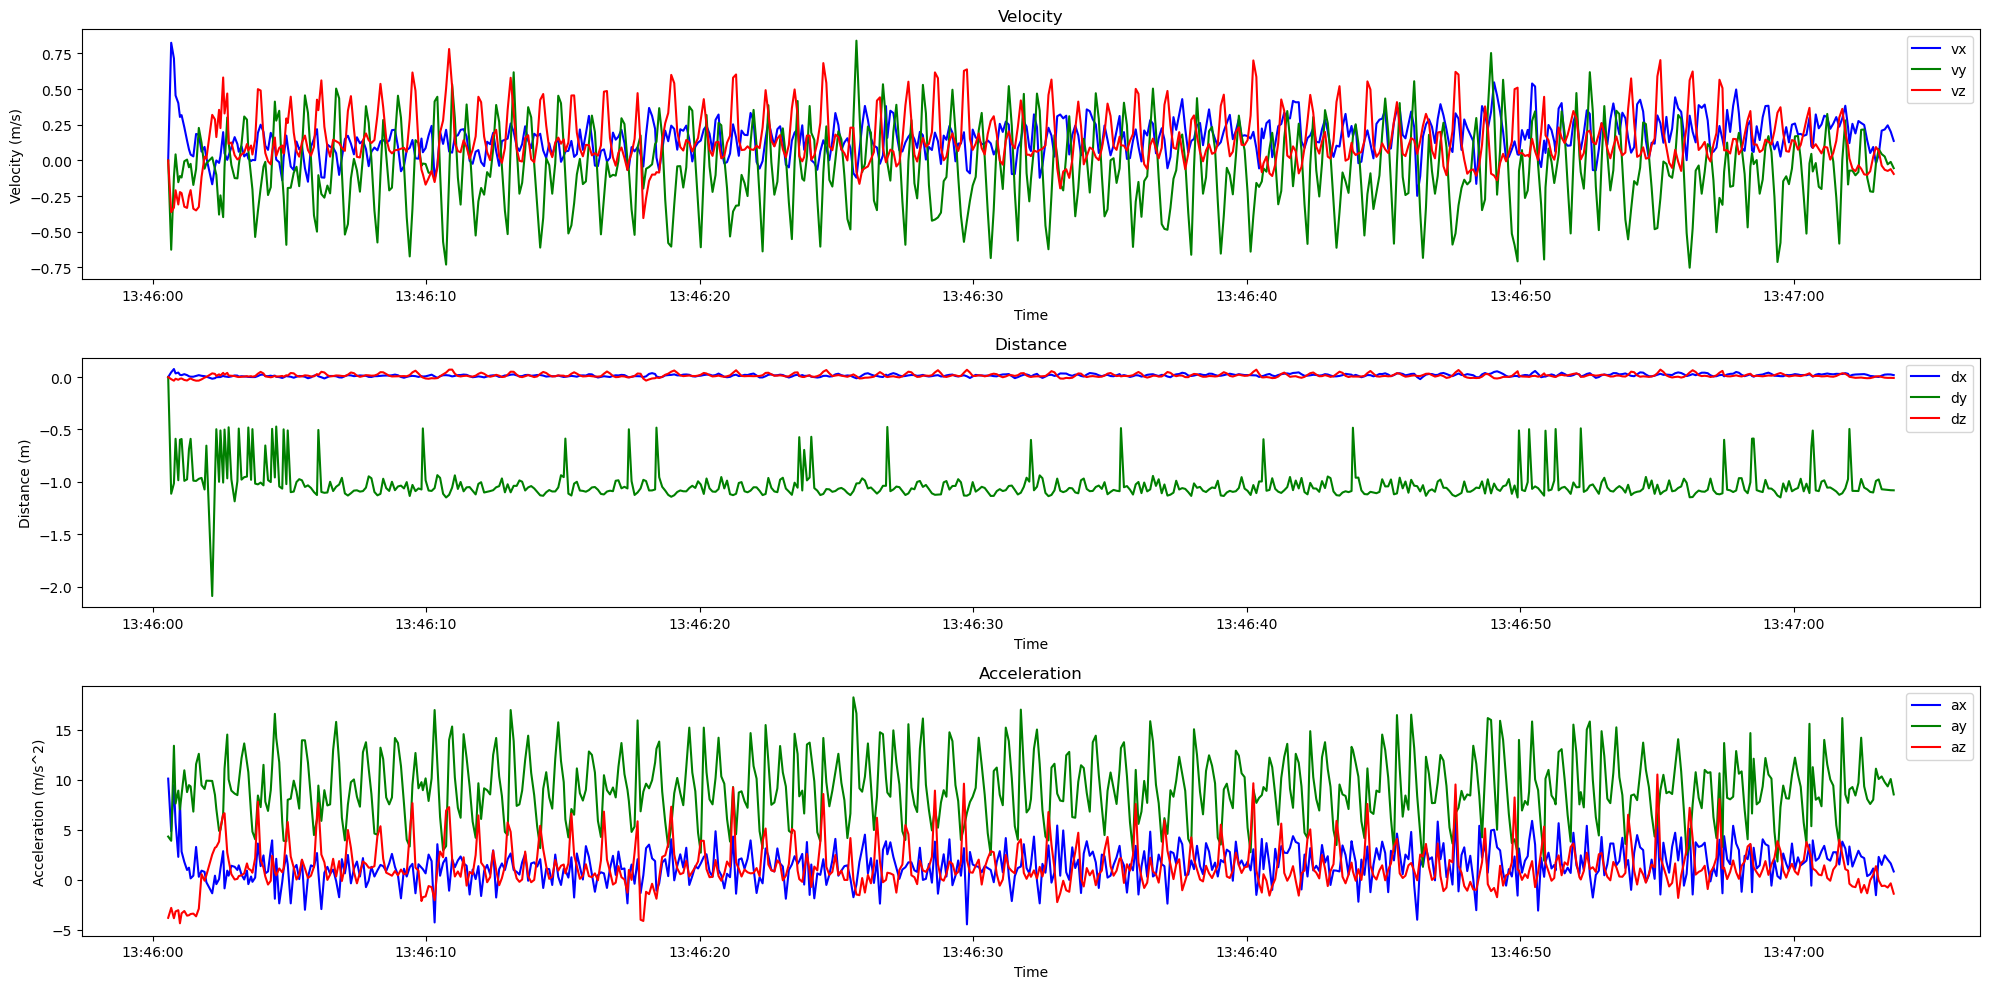

In [100]:
plot_df(df_upstairs)

In [101]:
df_test = df_upstairs[['DateTime', 'dx', 'dy', 'dz']]
df_test.to_csv('upstairs.csv', index=False)

In [102]:
df_downstairs = data1[data1.Segment==4]

In [103]:
df_downstairs = modify_df(df_downstairs)

C:\Users\koust\AppData\Local\Temp\ipykernel_32404\666625266.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_Difference'] = time_differences
C:\Users\koust\AppData\Local\Temp\ipykernel_32404\666625266.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Difference_Microseconds'] = df['Time_Difference'].diff()
C:\Users\koust\AppData\Local\Temp\ipykernel_32404\666625266.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pand

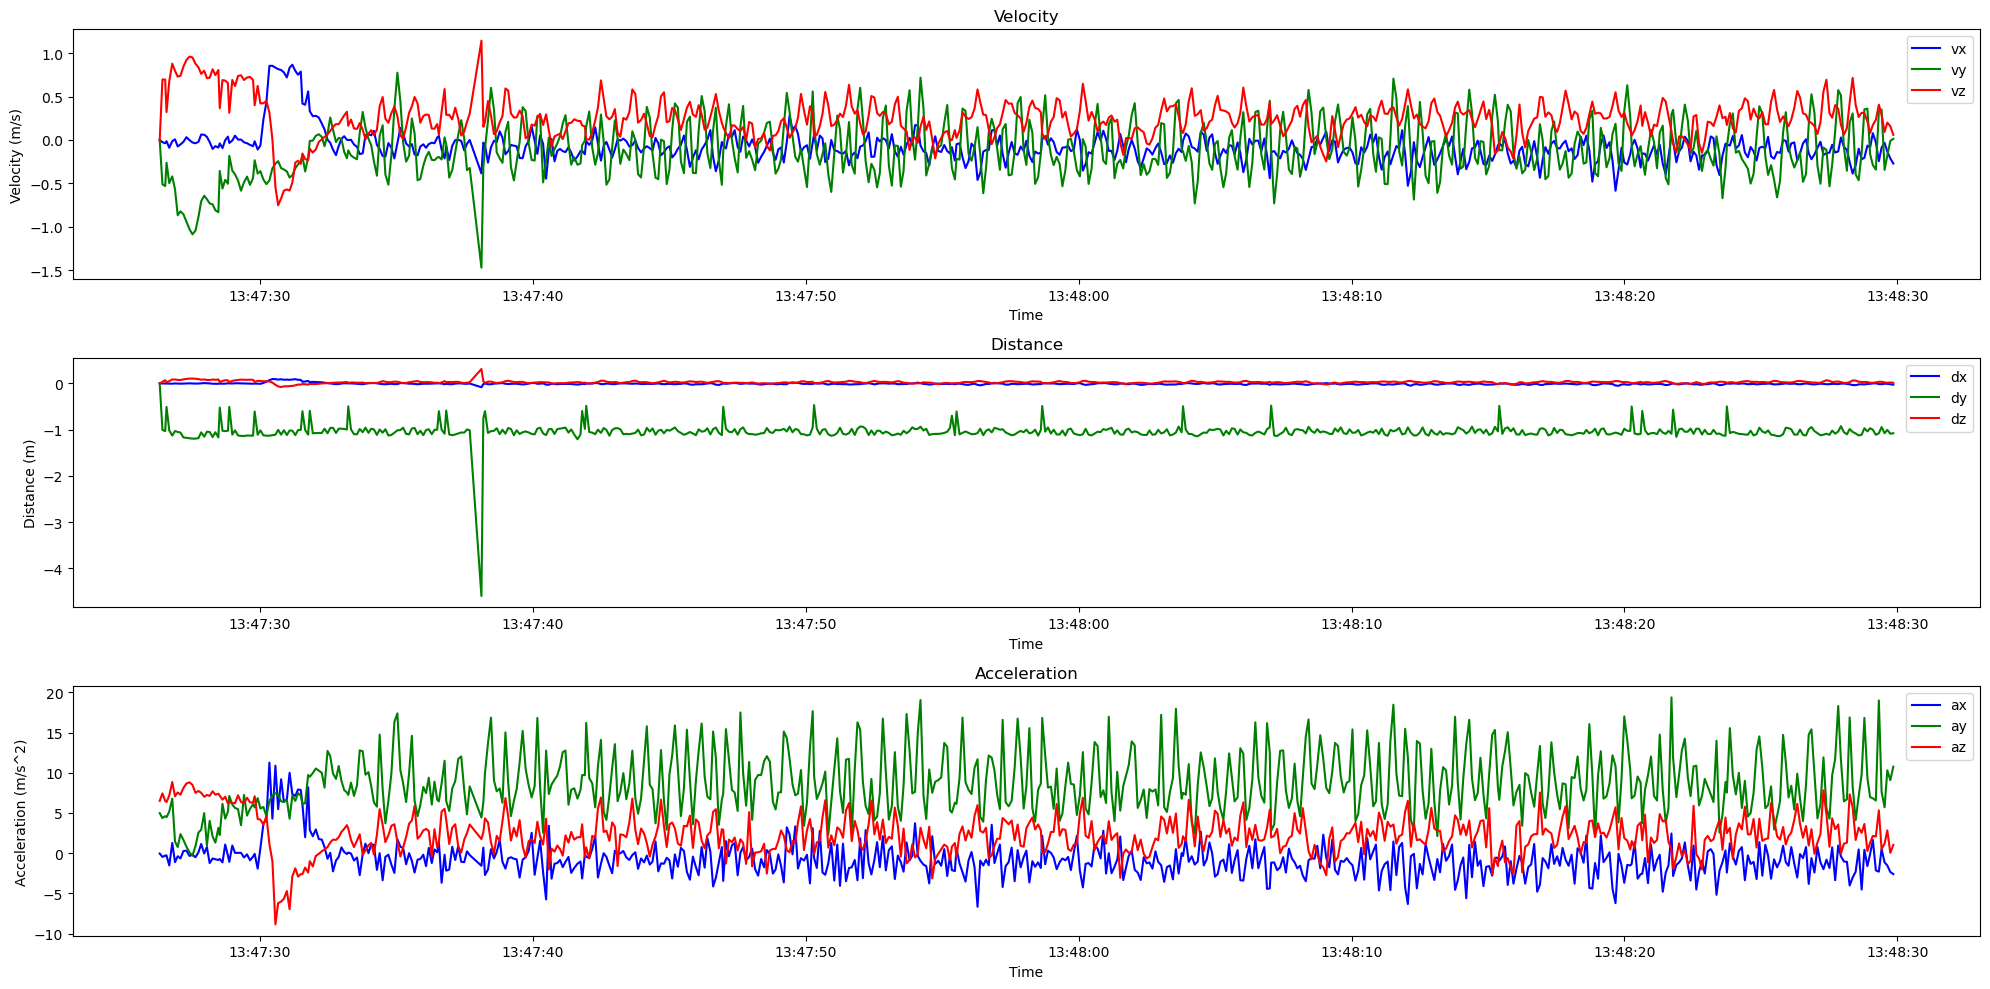

In [104]:
plot_df(df_downstairs)

In [105]:
df_test = df_downstairs[['DateTime', 'dx', 'dy', 'dz']]
df_test.to_csv('downstairs.csv', index=False)

In [79]:
data1[data1.Activity=='Standing']

User  Activity     Timestamp     x      y         z     Time_secs  \
223432   27  Standing  1.253589e+13 -1.88   9.85 -0.231546  12535.892255   
223433   27  Standing  1.253594e+13 -0.19   9.92 -0.572055  12535.942273   
223434   27  Standing  1.253599e+13 -0.61  10.27 -0.885323  12535.992231   
223435   27  Standing  1.253604e+13  0.76  10.57 -1.757025  12536.042310   
223436   27  Standing  1.253609e+13  0.42   9.47 -1.116869  12536.092206   
...     ...       ...           ...   ...    ...       ...           ...   
257318   36  Standing  1.504901e+13 -0.91   9.43  2.533385  15049.012250   
257319   36  Standing  1.504906e+13 -1.18   9.51  2.492524  15049.062268   
257320   36  Standing  1.504911e+13 -1.50   9.53  2.533385  15049.112287   
257321   36  Standing  1.504916e+13 -2.07   8.77  2.179256  15049.162275   
257322   36  Standing  1.504921e+13 -2.14   9.89  3.255263  15049.212262   

        Segment                   DateTime             Time  
223432      106 1970-01-01 03:28:55.892255  03:28:55.892255  
223433      106 1970-01-01 03:28:55.942273  03:28:55.942273  
223434      106 1970-01-01 03:28:55.992231  03:28:55.992231  
223435      106 1970-01-01 03:28:56.042310  03:28:56.042310  
223436      106 1970-01-01 03:28:56.092206  03:28:56.092206  
...         ...                        ...              ...  
257318      118 1970-01-01 04:10:49.012250  04:10:49.012250  
257319      118 1970-01-01 04:10:49.062268  04:10:49.062268  
257320      118 1970-01-01 04:10:49.112287  04:10:49.112287  
257321      118 1970-01-01 04:10:49.162275  04:10:49.162275  
257322      118 1970-01-01 04:10:49.212262  04:10:49.212262  

[3555 rows x 10 columns]

In [83]:
df_sitting = data1[data1.Segment==105]

In [84]:
df_sitting = modify_df(df_sitting)

C:\Users\koust\AppData\Local\Temp\ipykernel_32404\666625266.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_Difference'] = time_differences
C:\Users\koust\AppData\Local\Temp\ipykernel_32404\666625266.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Difference_Microseconds'] = df['Time_Difference'].diff()
C:\Users\koust\AppData\Local\Temp\ipykernel_32404\666625266.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pand

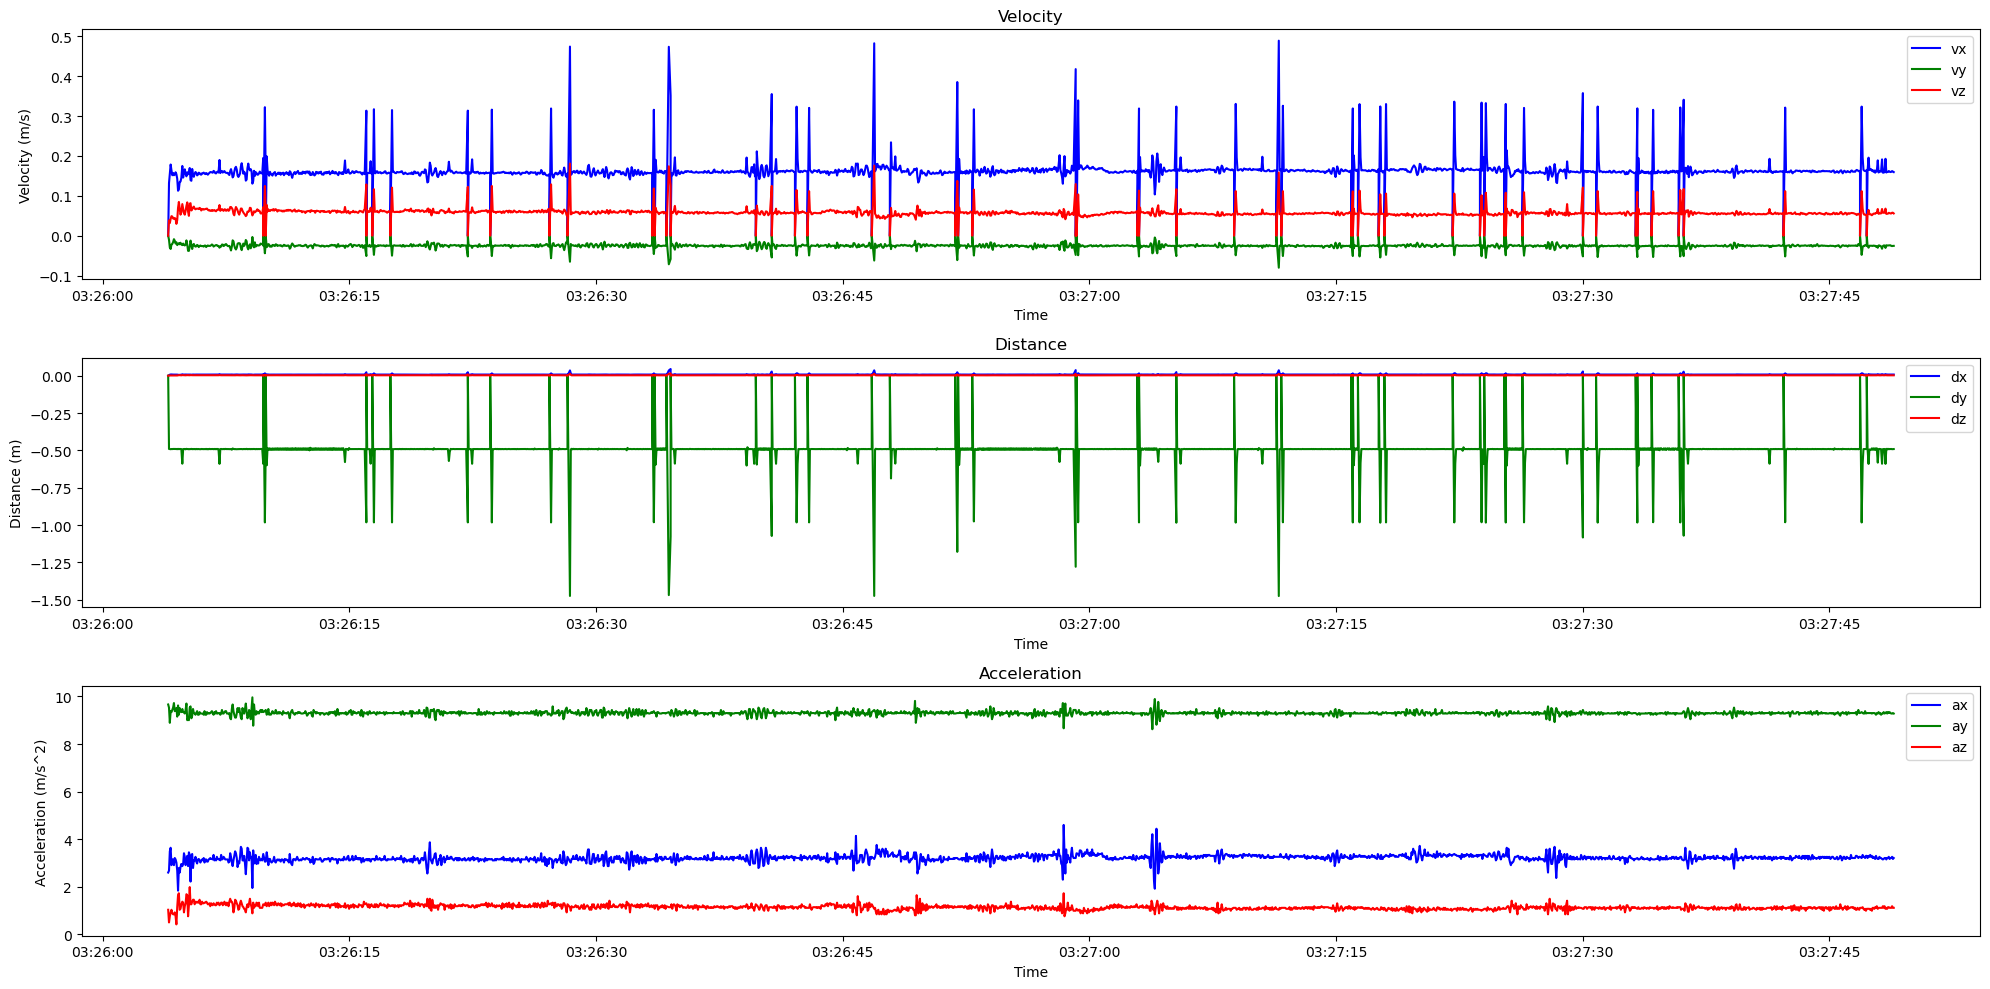

In [85]:
plot_df(df_sitting)

In [134]:
data1.Segment.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141])

In [86]:
df_test = df_sitting[['DateTime', 'dx', 'dy', 'dz']]
df_test.to_csv('sitting.csv', index=False)

In [87]:
df_standing = data1[data1.Segment==106]

In [88]:
df_standing = modify_df(df_standing)

C:\Users\koust\AppData\Local\Temp\ipykernel_32404\666625266.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_Difference'] = time_differences
C:\Users\koust\AppData\Local\Temp\ipykernel_32404\666625266.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Difference_Microseconds'] = df['Time_Difference'].diff()
C:\Users\koust\AppData\Local\Temp\ipykernel_32404\666625266.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pand

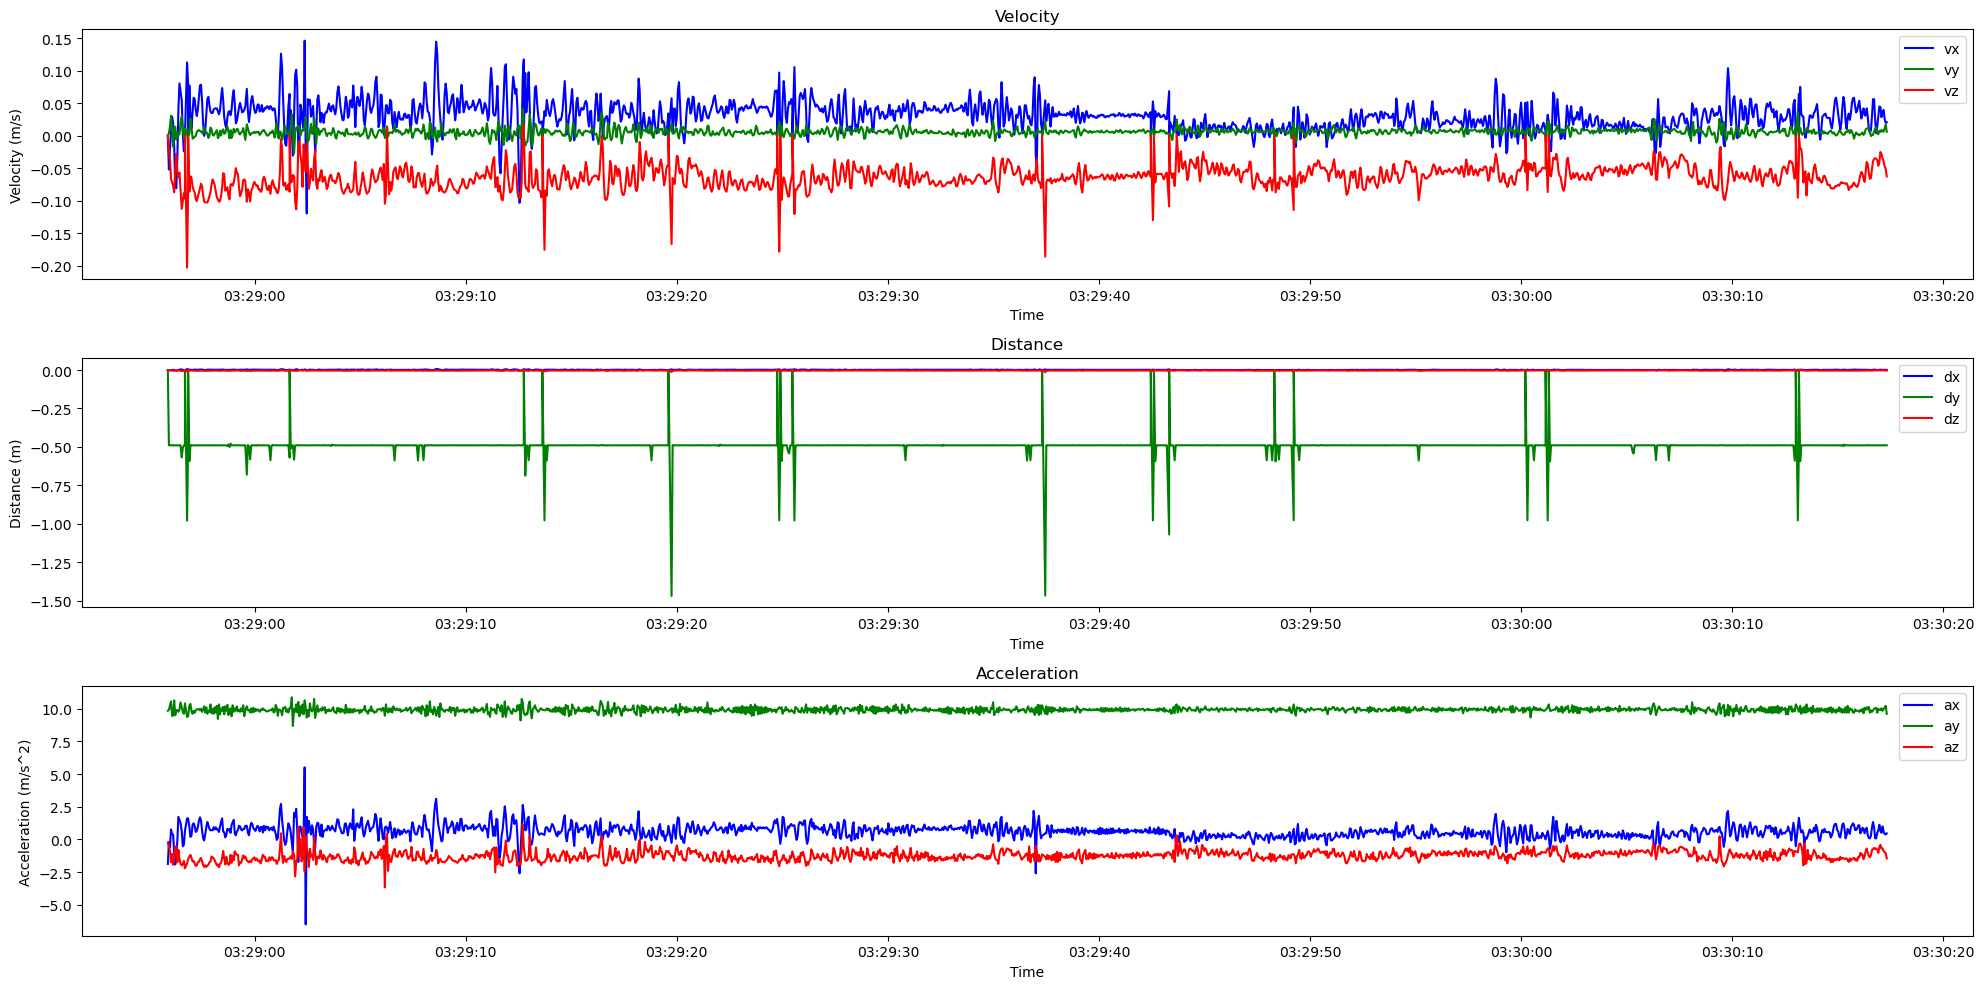

In [89]:
plot_df(df_standing)

In [90]:
df_test = df_standing[['DateTime', 'dx', 'dy', 'dz']]
df_test.to_csv('standing.csv', index=False)

### Scikit Kinematics

In [84]:
pip install git+https://github.com/thomas-haslwanter/easygui

  Running command git clone --filter=blob:none --quiet https://github.com/thomas-haslwanter/easygui 'C:\Users\koust\AppData\Local\Temp\pip-req-build-br4934x7'



  Cloning https://github.com/thomas-haslwanter/easygui to c:\users\koust\appdata\local\temp\pip-req-build-br4934x7
  Resolved https://github.com/thomas-haslwanter/easygui to commit de37c6e6effdc05df35f89d609486b6c3c89feef
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for easygui: filename=easygui-0.98.0-py2.py3-none-any.whl size=88336 sha256=62c18b135a55a0325da976c5b7666ddfadf670c8b81d5f2e6debea403103895c
  Stored in directory: C:\Users\koust\AppData\Local\Temp\pip-ephem-wheel-cache-ebdtu5sx\wheels\0f\8b\c6\ed031eac6263437435e89b43117cdb1fda3fa4d9d43111c54e
Successfully built easygui


In [85]:
pip install scikit-kinematics

   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.5 MB 919.0 kB/s eta 0:00:03
   ----- ---------------------------------- 0.4/2.5 MB 3.2 MB/s eta 0:00:01
   -------- ------------------------------- 0.6/2.5 MB 3.9 MB/s eta 0:00:01
   -------- ------------------------------- 0.6/2.5 MB 3.9 MB/s eta 0:00:01
   ---------------- ----------------------- 1.0/2.5 MB 4.4 MB/s eta 0:00:01
   ---------------- ----------------------- 1.0/2.5 MB 4.4 MB/s eta 0:00:01
   ----------------- ---------------------- 1.1/2.5 MB 3.2 MB/s eta 0:00:01
   --------------------- ------------------ 1.4/2.5 MB 3.5 MB/s eta 0:00:01
   ---------------------------- ----------- 1.8/2.5 MB 3.9 MB/s eta 0:00:01
   --------------------------------- ------ 2.1/2.5 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------  2.5/2.5 MB 4.7 MB/s eta 0:00:01
   ---------------------

In [87]:
import skinematics as skin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
from skinematics import imus, quat, vector, rotmat

### Vpython

In [60]:
!pip install vpython

In [61]:
from vpython import *

<IPython.core.display.Javascript object>

In [62]:
# man = sphere(pos= vector(0,0,0), radius = 5, color = color.yellow, make_trail = True)

# for i in range(len(df.DateTime)):
#     rate(500)
#     man.pos = vector(df.dx[i], df.dy[i], df.dz[i])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

### QMT

In [181]:
data

User Activity     Timestamp         x          y         z
0        33  Jogging  4.910596e+13 -0.694638  12.680544  0.503953
1        33  Jogging  4.910606e+13  5.012288  11.264028  0.953424
2        33  Jogging  4.910611e+13  4.903325  10.882658 -0.081722
3        33  Jogging  4.910622e+13 -0.612916  18.496431  3.023717
4        33  Jogging  4.910633e+13 -1.184970  12.108489  7.205164
...     ...      ...           ...       ...        ...       ...
343411   11  Walking  1.786872e+12  0.310000  10.730000  0.040861
343412   11  Walking  1.786922e+12  2.760000  10.950000  0.844462
343413   11  Walking  1.786972e+12  0.800000  10.150000  1.334794
343414   11  Walking  1.787022e+12 -1.570000   8.690000  1.416516
343415   11  Walking  1.787072e+12 -2.560000   8.580000  1.879608

[343416 rows x 6 columns]

In [182]:
data.head(220)

User Activity     Timestamp         x          y          z
0     33  Jogging  4.910596e+13 -0.694638  12.680544   0.503953
1     33  Jogging  4.910606e+13  5.012288  11.264028   0.953424
2     33  Jogging  4.910611e+13  4.903325  10.882658  -0.081722
3     33  Jogging  4.910622e+13 -0.612916  18.496431   3.023717
4     33  Jogging  4.910633e+13 -1.184970  12.108489   7.205164
..   ...      ...           ...       ...        ...        ...
215   33  Jogging  4.912852e+13 -6.701211   4.562817   3.105439
216   33  Jogging  4.912863e+13 -1.566340   1.266692   0.885323
217   33  Jogging  4.912874e+13 -0.953424  19.572440   8.349273
218   33  Jogging  4.912884e+13 -0.912563  -3.949901  -2.982856
219   33  Jogging  4.912895e+13 -2.029432  11.413852  15.404613

[220 rows x 6 columns]

In [183]:
data_trial = data.head(597)

In [184]:
import numpy as np
from scipy.spatial.transform import Rotation

def accelerometer_to_quaternion(accel_data):
    # Normalize accelerometer readings
    accel_data /= np.linalg.norm(accel_data)

    # Estimate orientation quaternion using accelerometer data
    gravity_vector = np.array([0, 0, 1])  # Assuming gravity acts along the z-axis
    rotation_axis = np.cross(accel_data, gravity_vector)
    rotation_angle = np.arccos(np.dot(accel_data, gravity_vector))
    rotation_quat = Rotation.from_rotvec(rotation_axis * rotation_angle).as_quat()

    return rotation_quat

# Example accelerometer data (normalized)
accel_data = np.array([0.5, 0.5, 0.707])  # Example: [0.5, 0.5, sqrt(2)/2] normalized

# Convert accelerometer data to quaternion
quat = accelerometer_to_quaternion(accel_data)

print("Quaternion:", quat)


KeyboardInterrupt: 

In [ ]:
data_trial.tail()

User Activity     Timestamp         x         y         z
592   33  Jogging  4.916891e+13  1.307553  3.173541 -0.612916
593   33  Jogging  4.918379e+13 -1.116869  2.642348  8.076866
594   33  Jogging  4.918387e+13 -0.994285  3.023717  8.308413
595   33  Jogging  4.918393e+13 -1.076008  3.445948  8.049625
596   33  Jogging  4.918404e+13 -1.076008  5.216593  6.891896

In [ ]:
data_trial.Activity.size

597

In [ ]:
data_trial.Activity.unique()[0]

'Jogging'

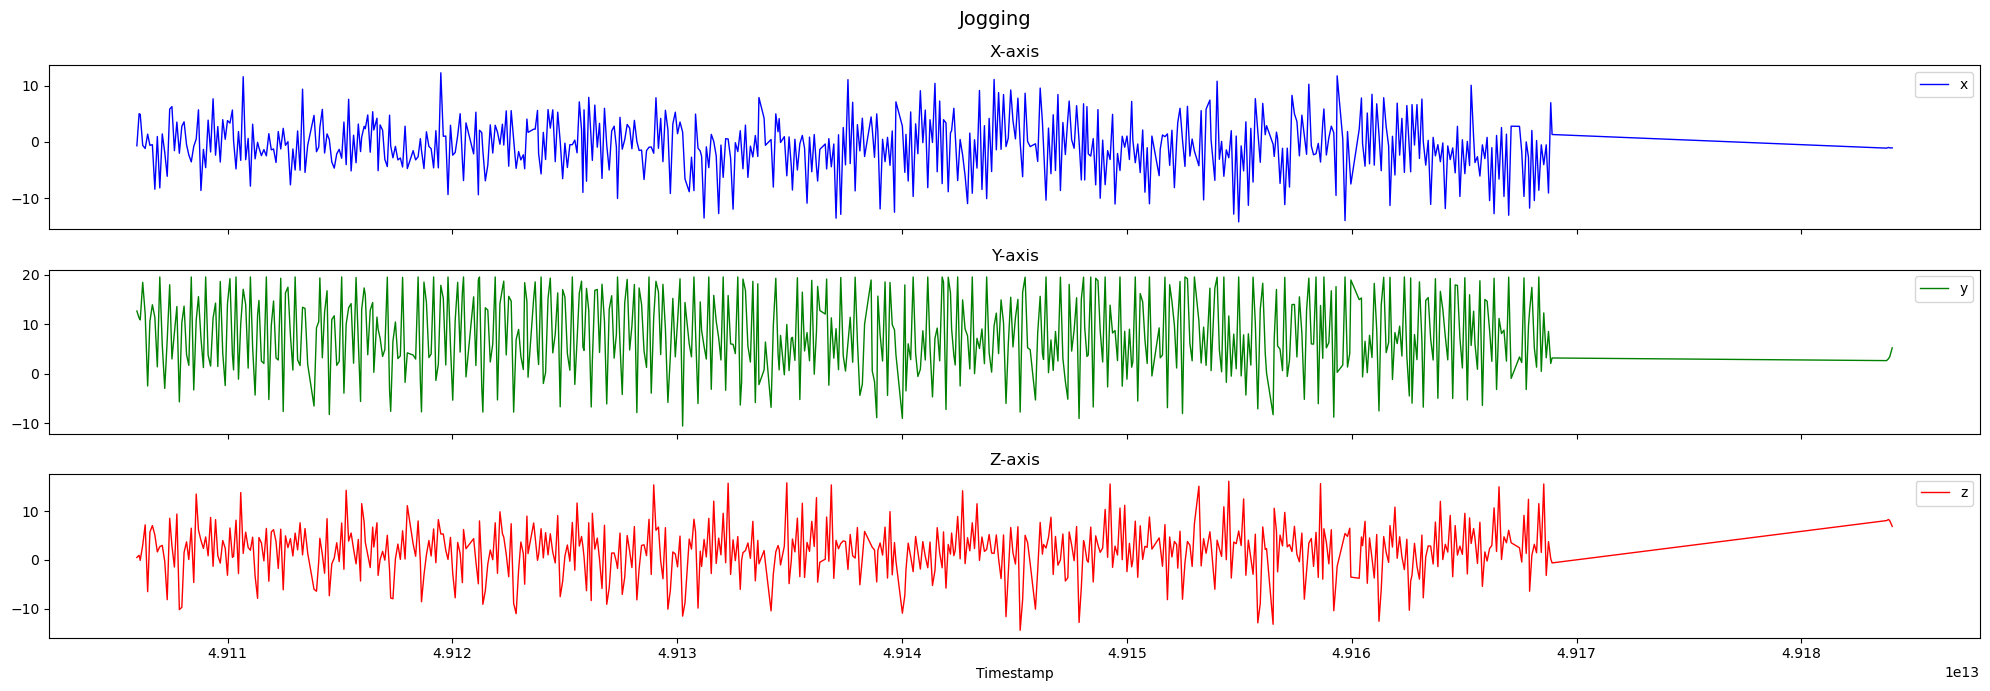

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots arranged in a 3x1 grid
fig, axs = plt.subplots(3, 1, figsize=(20, 7), sharex=True)

# Plot data on each subplot
xaxis = data_trial.Timestamp

# Plot x-axis data
axs[0].plot(xaxis, data_trial.x, label='x', linewidth=1.0, color='blue')
axs[0].set_title('X-axis')
axs[0].legend()

# Plot y-axis data
axs[1].plot(xaxis, data_trial.y, label='y', linewidth=1.0, color='green')
axs[1].set_title('Y-axis')
axs[1].legend()

# Plot z-axis data
axs[2].plot(xaxis, data_trial.z, label='z', linewidth=1.0, color='red')
axs[2].set_title('Z-axis')
axs[2].legend()

# Set x-axis label for the bottom subplot
axs[2].set_xlabel('Timestamp')

# Add an overall title to the figure
fig.suptitle(data_trial.Activity.unique()[0], fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


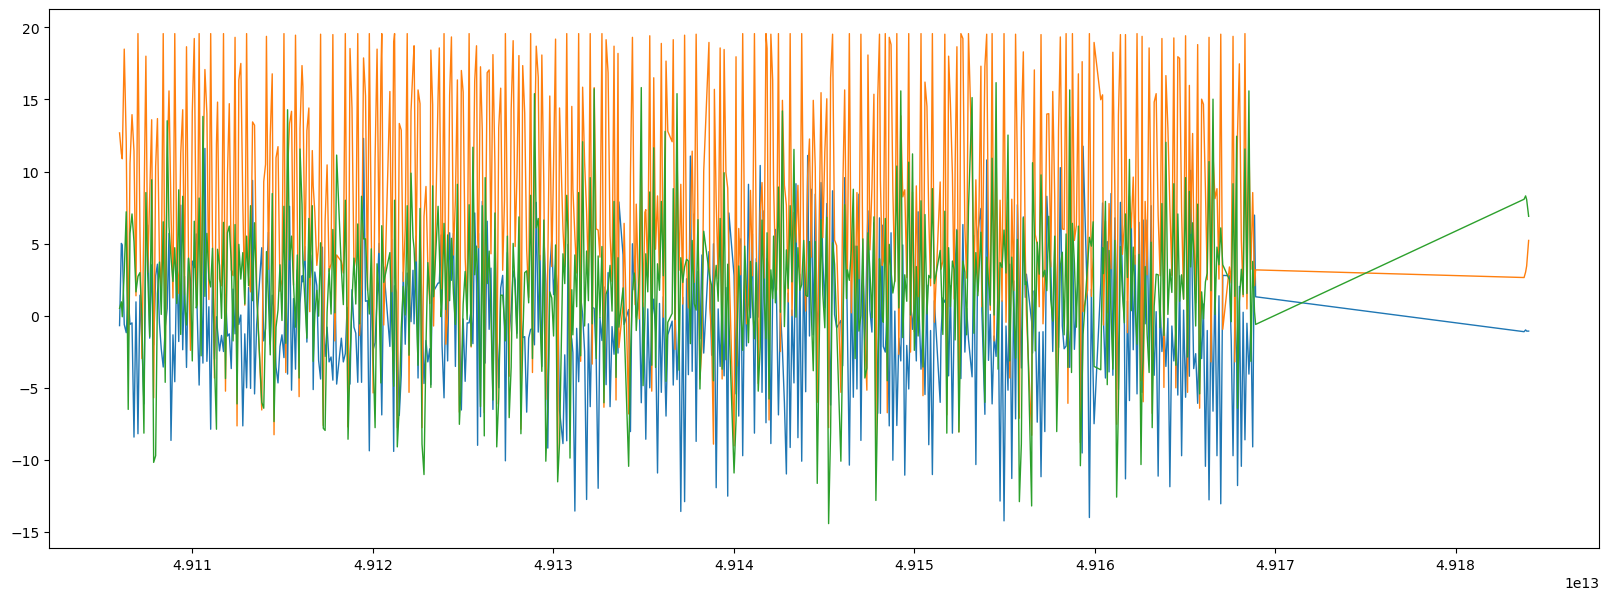

In [ ]:
plt.figure(figsize=(20, 7))

xaxis = data_trial.Timestamp
plt.plot(xaxis, data_trial.x, label='x', linewidth=1.0)
plt.plot(xaxis, data_trial.y, label='y', linewidth=1.0)
plt.plot(xaxis, data_trial.z, label='z', linewidth=1.0)

In [ ]:
coord_columns = ['x', 'y', 'z']

In [ ]:
coord_data = data_trial[coord_columns].copy()

In [ ]:
demo_data = coord_data.values

In [ ]:
demo_data

array([[-0.6946377 , 12.680544  ,  0.50395286],
       [ 5.012288  , 11.264028  ,  0.95342433],
       [ 4.903325  , 10.882658  , -0.08172209],
       ...,
       [-0.9942854 ,  3.0237172 ,  8.308413  ],
       [-1.0760075 ,  3.445948  ,  8.049625  ],
       [-1.0760075 ,  5.2165933 ,  6.891896  ]])

In [ ]:
quats_demo = []

for i in demo_data:
    quat = accelerometer_to_quaternion(i)
    quats_demo.append(quat)

print("Quaternion:", quats_demo)


Quaternion: [array([ 0.69147513,  0.03787887, -0.        ,  0.7214065 ]), array([ 0.61913648, -0.27550449,  0.        ,  0.73536882]), array([ 0.64688119, -0.29146085,  0.        ,  0.70469518]), array([ 0.64018961,  0.02121394, -0.        ,  0.76792397]), array([ 0.42908798,  0.04199174, -0.        ,  0.90228609]), array([-0.45519838, -0.25122972,  0.        ,  0.85421195]), array([ 0.45546704,  0.02641239, -0.        ,  0.88986075]), array([ 0.4721387 ,  0.0170597 , -0.        ,  0.88135919]), array([ 0.43763125,  0.3232622 , -0.        ,  0.83903542]), array([ 0.22916934, -0.15883022,  0.        ,  0.96034076]), array([ 0.60517891,  0.2535266 , -0.        ,  0.75464081]), array([ 0.46128038, -0.11287803,  0.        ,  0.88004486]), array([-0.62135163,  0.39153667,  0.        ,  0.67869079]), array([ 0.56425076,  0.50479691, -0.        ,  0.6533002 ]), array([ 0.4749618 , -0.15376978,  0.        ,  0.86646763]), array([ 0.22106647, -0.46534999,  0.        ,  0.85707584]), array([ 0.7

In [ ]:
len(quats_demo)

597

In [ ]:
import qmt

In [ ]:
# # create some quaternion data for testing
# t = qmt.timeVec(T=10, Ts=0.01)
# axis = np.column_stack([np.cos(t), np.zeros_like(t), np.sin(t)])
# quat = qmt.quatFromAngleAxis(np.sin(t), axis)
# data = qmt.Struct(t=t, quat=quat)

# # run webapp
# webapp = qmt.Webapp('/view/imubox', data=data, show='chromium', quiet=True)
# webapp.run()

In [ ]:
# import numpy as np
# import qmt

# # Sample accelerometer data
# # Assume you have accelerometer data in the form of Nx3 array (N samples, 3 axes: x, y, z)
# # Replace this with your actual accelerometer data
# accel_data = coord_data  # Example: Random accelerometer data

# # Sampling frequency (Hz)
# sampling_frequency = 100  # Example: Sampling frequency of 100 Hz

# # Create QMT object
# # qmt_object = qmt.QMT(sampling_frequency)

# # Initialize quaternion
# q_initial = qmt.Quaternion([1, 0, 0, 0])  # Identity quaternion

# # Process accelerometer data to estimate orientation
# for i in range(len(accel_data)):
#     qmt_object.update(accel_data[i])

# # Get orientation quaternion
# orientation_quaternion = qmt.randomQuat(100)

# # Convert quaternion to Euler angles (roll, pitch, yaw)
# euler_angles = orientation_quaternion.to_euler()

# # Print Euler angles
# print("Euler Angles (roll, pitch, yaw) in degrees:")
# print(np.degrees(euler_angles))

In [ ]:
q1 = qmt.randomQuat(100)

In [ ]:
q1

array([[ 0.01161845, -0.63227331,  0.37586867,  0.67736121],
       [ 0.7370072 ,  0.17184803, -0.11259936, -0.64390218],
       [ 0.82468413,  0.49650818, -0.22779582, -0.14657686],
       [-0.23173863, -0.2023532 , -0.91924221,  0.24565047],
       [-0.51919596, -0.12305355,  0.66646588, -0.5206886 ],
       [ 0.56245482, -0.5820679 , -0.41216343, -0.4182856 ],
       [-0.13883082,  0.03133689, -0.663643  , -0.73438544],
       [-0.31801488,  0.86680167, -0.19236525,  0.33244099],
       [ 0.90713434, -0.21554655,  0.22737268,  0.28097802],
       [-0.06054911, -0.44568579,  0.80162645,  0.39381852],
       [-0.55659766, -0.24305815, -0.37068214, -0.70264965],
       [-0.36518965, -0.05969241, -0.84431402, -0.38756571],
       [-0.01567261,  0.4711089 ,  0.61971832,  0.62750297],
       [ 0.85280134, -0.31831946, -0.28514173, -0.30016126],
       [-0.967618  , -0.12194516, -0.18158009,  0.12598987],
       [-0.35564137, -0.26908278, -0.55931484,  0.69877077],
       [ 0.72639071,  0.

In [ ]:
pip install PySide6

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install git+https://github.com/dlaidig/qmt

  Cloning https://github.com/dlaidig/qmt to c:\users\koust\appdata\local\temp\pip-req-build-65iz4_ov
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/dlaidig/qmt 'C:\Users\koust\AppData\Local\Temp\pip-req-build-65iz4_ov'
  fatal: unable to access 'https://github.com/dlaidig/qmt/': Could not resolve host: github.com
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/dlaidig/qmt 'C:\Users\koust\AppData\Local\Temp\pip-req-build-65iz4_ov' did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/dlaidig/qmt 'C:\Users\koust\AppData\Local\Temp\pip-req-build-65iz4_ov' did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
# ./build_webapp_lib.sh
# # pip install --user -e ".[dev]"
# ./build_docs.sh

In [ ]:
%cd qmt

c:\Users\koust\OneDrive\Desktop\Course Prep\Dissertation\qmt


In [ ]:
!pip3 install --user -e ".[dev]"

Obtaining file:///C:/Users/koust/OneDrive/Desktop/Course%20Prep/Dissertation/qmt
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for qmt (pyproject.toml): started
  Building editable for qmt (pyproject.toml): finished with status 'done'
  Created wheel for qmt: filename=qmt-0.2.4-0.editable-cp311-cp311-win_amd64.whl size=4284 sha256=a6de2ca7e14d19342bac8102fa11df696553197d67c7b2a9de75ddf6ed71e8b3
  Stored in directory: C:\Users\koust\AppData\Local\Temp\pip-ephem-wheel-cache-83hc9uxa\wheels\6e\d6\51\5158ecae062b9a9e3f7e240a4e43

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
# """
# Install:
#     pip3 install --user -e ".[dev]"

# Recompile extension modules
#     python3 setup.py build_ext --inplace -f
# """
# # SPDX-FileCopyrightText: 2021 Daniel Laidig <laidig@control.tu-berlin.de>
# #
# # SPDX-License-Identifier: MIT


# # https://stackoverflow.com/a/60740179
# # (note that even with pyproject.toml this is still useful to make `python setup.py sdist` work out-of-the-box)
# from setuptools import dist
# dist.Distribution().fetch_build_eggs(['Cython', 'numpy'])

# import site
# import sys
# from setuptools import setup, find_packages
# from Cython.Build import cythonize
# import numpy as np

# # workaround for develop mode (pip install -e) with PEP517/pyproject.toml cf. https://github.com/pypa/pip/issues/7953
# site.ENABLE_USER_SITE = '--user' in sys.argv[1:]

# ext_modules = cythonize([
#     'qmt/cpp/oriestimu.pyx',
#     'qmt/cpp/madgwick.pyx',
#     'qmt/cpp/quaternion.pyx',
# ])

# for m in ext_modules:
#     m.include_dirs.insert(0, np.get_include())

# setup(
#     name='qmt',
#     version='0.2.4',

#     description='Quaternion-based Inertial Motion Tracking Toolbox',
#     long_description=open('README.rst', encoding='utf-8').read(),
#     long_description_content_type="text/x-rst",
#     url='https://github.com/dlaidig/qmt/',
#     project_urls={
#         'Documentation': 'https://qmt.readthedocs.io/',
#     },

#     author='Daniel Laidig',
#     author_email='laidig@control.tu-berlin.de',
#     license='MIT',
#     classifiers=[
#         'Development Status :: 4 - Beta',
#         'Intended Audience :: Science/Research',
#         'License :: OSI Approved :: MIT License',
#         'Programming Language :: Python :: 3',
#     ],

#     packages=find_packages(exclude=['contrib', 'docs', 'tests']),
#     include_package_data=True,
#     zip_safe=False,

#     python_requires='>=3.8',
#     install_requires=['numpy', 'scipy>=1.8.0', 'matplotlib', 'PyYAML',
#                       'transplant>=0.8.11',  # 0.8.11 fixes https://github.com/bastibe/transplant/issues/81
#                       'aiohttp>=3.8.1', 'aiofiles', 'orjson', 'qasync', 'vqf>=2.0.0'],
#     extras_require={
#         # pip3 install --user -e ".[dev]"
#         'dev': ['pytest', 'flake8',
#                 'reuse', 'Cython', 'sphinx', 'recommonmark', 'sphinx-rtd-theme', 'sphinxcontrib-matlabdomain'],
#     },

#     entry_points={
#         'console_scripts': [
#             'qmt-webapp = qmt.utils.webapp_cli:main',
#         ],
#     },

#     ext_modules=ext_modules,

#     include_dirs=[np.get_include()],
# )

In [ ]:
# #!/usr/bin/env python3
# # SPDX-FileCopyrightText: 2021 Daniel Laidig <laidig@control.tu-berlin.de>
# #
# # SPDX-License-Identifier: MIT
# import multiprocessing
# import time

# import qmt
# import numpy as np


# def offlineWithDefaultConfig():
#     """Simple webapp demo to show how offline playback of data works"""

#     # create some quaternion data for testing
#     t = qmt.timeVec(T=10, Ts=0.01)
#     axis = np.column_stack([np.cos(t), np.zeros_like(t), np.sin(t)])
#     quat = qmt.quatFromAngleAxis(np.sin(t), axis)
#     data = qmt.Struct(t=t, quat=quat)

#     # run webapp
#     webapp = qmt.Webapp('/view/imubox', data=data)
#     webapp.run()


# def offlineWithCustomConfig():
#     """
#     Example of how to use a config.

#     By default, the /view/imubox webapp will detect all signals named "quat" or "quat" + one single letter, and
#     visualize them (with the single letter painted on the box). It is also possible to define a custom config that will
#     define which data is displayed.
#     """

#     # create some quaternion data for testing
#     t = qmt.timeVec(T=10, Ts=0.01)
#     axis = np.column_stack([np.cos(t), np.zeros_like(t), np.sin(t)])
#     quat = qmt.quatFromAngleAxis(np.sin(t), axis)
#     quat2 = qmt.qinv(quat)
#     data = qmt.Struct(t=t, quat1=quat, quat2=quat2)

#     # This config tells the webapp how many IMU boxes to create and how the variables are called.
#     # Furthermore, we show the first quaternion twice and use a different IMU coordinate system for the second copy A'
#     # (x axis pointing forward instead of right). For the last IMU, we enable axis arrows.
#     # Markers can be specified to annotate specific parts of the generated data in the playback timeline.
#     config = {
#         'imus': [
#             {'signal': 'quat1', 'letter': 'A'},
#             {'signal': 'quat1', 'letter': 'A\'', 'cs': 'FLU'},
#             {'signal': 'quat2', 'letter': 'B', 'axes': True},
#         ],
#         'markers': [{'pos': 4, 'end': 6, 'name': 'example for a range marker'}],
#     }

#     webapp = qmt.Webapp('/view/imubox', config=config, data=data)
#     webapp.run()


# def online():
#     """
#     Simple example for online data processing

#     We use a ClockDataSource to generate samples at a fixed interval and create a simple Block class that does the
#     online data processing. The ClockDataSource generates samples that only contain the time, but we could also use
#     data sources that provide real-time measurement data from IMUs (e.g. via bluetooth).
#     """

#     class ExampleBlock(qmt.Block):
#         def step(self, inputs):
#             t = inputs['t']
#             axis = [np.cos(t), np.zeros_like(t), np.sin(t)]
#             quat = qmt.quatFromAngleAxis(np.sin(t), axis)
#             return {'t': t, 'quat': quat.flatten()}

#     webapp = qmt.Webapp('/view/imubox')
#     webapp.setupOnlineLoop(qmt.ClockDataSource(0.04), ExampleBlock())
#     webapp.run()


# def onlineDummyImuData():
#     """
#     Simple example for the dummy IMU data souce

#     The DummyImuDataSource generates artificial IMU data. In this example, we just show the quaternions generated by
#     the data source, but we could easily add a processing block (like in the example above) to perform custom data
#     processing based on the gyroscope, accelerometer, and magnetometer measurements.
#     """

#     webapp = qmt.Webapp('/view/imubox')
#     webapp.setupOnlineLoop(qmt.DummyImuDataSource(0.04, 5))
#     # We could also use qmt.dataSourceFromJson to dynamically create the data source from a JSON configuration string.
#     # This can be used to allow for loading a data source that accesses real IMU data from external module, and define
#     # this module and the necessary parameters via a command line argument.
#     # webapp.setupOnlineLoop(qmt.dataSourceFromJson('{"class": "qmt.DummyImuDataSource", "Ts": 0.04, "N": 3}'))
#     webapp.run()


# def pythonPlayback():
#     """
#     Example of how to play back existing data from Python

#     Unlike the previous offline examples, playback is handed on the Python side and only the current sample is
#     transferred via the websocket. This is for example useful to replay experiments in order to create
#     high quality videos.

#     Note that we can also combine this with online data processing, e.g. to replay a file containing sensor data and
#     processing it in real-time.
#     """

#     # generate .mat file with data for playback
#     t = qmt.timeVec(T=10, Ts=0.01)
#     axis = np.column_stack([np.cos(t), np.zeros_like(t), np.sin(t)])
#     quat = qmt.quatFromAngleAxis(np.sin(t), axis)
#     quat2 = qmt.qinv(quat)
#     data = qmt.Struct(t=t, quat1=quat, quat2=quat2)
#     data.save('example_output/webapp_example_data.mat', makedirs=True)

#     config = {
#         'imus': [
#             {'signal': 'quat1', 'letter': 'A'},
#             {'signal': 'quat2', 'letter': 'B'},
#         ]
#     }

#     # let's also save the config to a file. this way, you can test the command line tool:
#     # qmt-webapp /view/imubox -d example_output/webapp_example_data.mat -c example_output/webapp_example_config.mat
#     qmt.Struct(config).save('example_output/webapp_example_config.mat', makedirs=True)

#     webapp = qmt.Webapp('/view/imubox', config=config)
#     # Note that saving to a file is not necessary and we can just directly pass the data object.
#     # We could also use qmt.PlaybackDataSource to control addtional parameters (e.g. looping).
#     webapp.setupOnlineLoop('example_output/webapp_example_data.mat')
#     webapp.run()


# def interactiveOffline():
#     """
#     Example for interactive offline batch processing

#     With the show_speed_slider option, we tell the visualisation to create a slider. Every time the value is changed,
#     we recalculate the whole data and send the new data to the visualization.
#     """

#     def processData(webapp, params):
#         speed = params['speed']
#         t = qmt.timeVec(T=10, Ts=0.01)
#         axis = np.column_stack([np.cos(speed*t), np.zeros_like(t), np.sin(speed*t)])
#         quat = qmt.quatFromAngleAxis(np.sin(speed * t), axis)
#         webapp.data = qmt.Struct(t=t, quat=quat)

#     config = {'show_speed_slider': True}
#     webapp = qmt.Webapp('/view/imubox', config=config)
#     webapp.on('params', processData)
#     webapp.run()


# def interactiveOnline():
#     """
#     Example for interactive online processing

#     With the show_speed_slider option, we tell the visualisation to create a slider. The setParam function of the
#     processing block will automatically be called every time the slider value changes.
#     """

#     class ExampleBlock(qmt.Block):
#         def __init__(self):
#             super().__init__()
#             self.params['speed'] = 1.0

#         def step(self, sample):
#             t = sample['t']
#             speed = self.params['speed']
#             axis = [np.cos(speed*t), 0, np.sin(speed*t)]
#             quat = qmt.quatFromAngleAxis(np.sin(speed * t), axis)
#             return {'t': t, 'quat': quat}

#     config = {'show_speed_slider': True}
#     webapp = qmt.Webapp('/view/imubox', config=config)
#     webapp.setupOnlineLoop(qmt.ClockDataSource(0.04), ExampleBlock())
#     webapp.run()


# def run(conn, Ts):
#     """Target function for the runCalculationsInProcess example."""
#     t0 = time.monotonic()
#     N = 0
#     try:
#         while True:
#             t = round(N*Ts, 9)
#             time.sleep(max(0, t0 + t - time.monotonic()))
#             N += 1

#             # receive parameters (and commands) from webapp
#             speed = conn.getParams().get('speed', 1.0)
#             for command in conn.getCommands():
#                 print('received command:', command)

#             # calculate and send sample
#             axis = [np.cos(speed * t), 0, np.sin(speed * t)]
#             quat = qmt.quatFromAngleAxis(np.sin(speed * t), axis)
#             conn.sendSample({'t': t, 'quat': quat})
#     except KeyboardInterrupt:
#         return  # stop process gracefully


# def runCalculationsInProcess():
#     """
#     Example for interactive online processing in a separate process

#     The function run is executed in a separate process via the ProcessDataSource and the multiprocessing package. The
#     run function can use a qmt.ProcessDataSourceConnection object to communicate with the webapp. This makes it possible
#     to integrate existing code that is written in a blocking way and does not function well in combination with async
#     code.
#     """

#     config = {'show_speed_slider': True}
#     webapp = qmt.Webapp('/view/imubox', config=config)
#     webapp.setupOnlineLoop(qmt.ProcessDataSource(run, 0.04))
#     webapp.run()


# def runWebappInProcess():
#     """
#     Example for running the webapp in a separate process

#     This example works similar to ProcessDataSource example, but instead of starting a blocking data processing function
#     in a new process, the Webapp is started in a separate process. A similar conn object is returned which can be used
#     to communicate with the webapp..
#     """

#     config = {'show_speed_slider': True}
#     webapp = qmt.Webapp('/view/imubox', config=config)
#     conn = webapp.runInProcess()

#     t0 = time.monotonic()
#     Ts = 0.04
#     N = 0
#     while True:
#         t = round(N * Ts, 9)
#         time.sleep(max(0.0, t0 + t - time.monotonic()))
#         N += 1

#         # receive parameters (and commands) from webapp
#         speed = conn.getParams().get('speed', 1.0)
#         for command in conn.getCommands():
#             print('received command:', command)
#         if conn.isClosed():
#             print('the webapp window was closed')
#             break
#         # if t == 10:  # note: we can also close the webapp by calling shutdown()
#         #     conn.shutdown()

#         # calculate and send sample
#         axis = [np.cos(speed * t), 0, np.sin(speed * t)]
#         quat = qmt.quatFromAngleAxis(np.sin(speed * t), axis)
#         conn.sendSample({'t': t, 'quat': quat})


# def runExample(f):
#     """Prints the docstring of the function and then runs it."""
#     from textwrap import dedent
#     print(f'\n{f.__name__}: {dedent(f.__doc__)}\n')
#     f()


# if __name__ == '__main__':
#     # Note: If PySide has already been used in the main process (e.g., by running a Webapp or by creating plots with
#     # matplotlib and the Qt5Agg backend), the `spawn` method has to be selected before calling runInProcess().
#     # With the `fork` method, the child process will inherit the singleton QApplication instance from the main process.
#     multiprocessing.set_start_method('spawn')

#     runExample(offlineWithDefaultConfig)
#     runExample(offlineWithCustomConfig)
#     runExample(online)
#     runExample(onlineDummyImuData)
#     runExample(pythonPlayback)
#     runExample(interactiveOffline)
#     runExample(interactiveOnline)
#     runExample(runCalculationsInProcess)
#     runExample(runWebappInProcess)

In [ ]:
# %pylab --no-import-all notebook
# import qmt, os, sys, time, re, glob, itertools, math, collections
# from pathlib import Path
# np.set_printoptions(suppress=True)

In [ ]:
t = qmt.timeVec(T=10, Ts=0.01)
axis = np.column_stack([np.cos(t), np.zeros_like(t), np.sin(t)])
quat = qmt.quatFromAngleAxis(np.sin(t), axis)
data = qmt.Struct(t=t, quat=quat)

# run webapp
webapp = qmt.Webapp('/view/imubox', data=data, show='iframe', quiet=True)
webapp.iframeHeight=250
webapp.run()

NameError: name 'qmt' is not defined

In [ ]:
# create some quaternion data for testing
t = qmt.timeVec(T=20, Ts=0.01)
axis = np.column_stack([np.cos(t), np.zeros_like(t), np.sin(t)])
quat = qmt.quatFromAngleAxis(np.sin(t), axis)
data = qmt.Struct(t=t, quat=quat)

# run webapp
webapp.data = data

In [ ]:
#!/usr/bin/env python3
# SPDX-FileCopyrightText: 2021 Bo Yang <b.yang@campus.tu-berlin.de>
# SPDX-FileCopyrightText: 2021 Daniel Laidig <laidig@control.tu-berlin.de>
#
# SPDX-License-Identifier: MIT
"""
Offline full body motion tracking example.

This example shows how the qmt framework can be used to perform offline full body 6D motion tracking and animate a 3D
avatar with just a few lines of code. This script is kept as short and simple as possible. For a more complex example,
see the file full_body_tracking_advanced_example.py.
"""
import qmt
import numpy as np

# manually tuned sensor-to-segment orientations and heading offsets
# (use the "copy config changes" button in the boxmodel webapp to obtain those values)
tunedParams = qmt.Struct({
    'hip':  {'heading_offset': 0.0, 'q_segment2sensor': [0.542, 0.542, 0.455, -0.455]},
    'lower_back': {'heading_offset': -30.0, 'q_segment2sensor': [0.455, 0.455, 0.542, -0.542]},
    'upper_back': {'heading_offset': 15.0, 'q_segment2sensor': [0.579, 0.579, 0.406, -0.406]},
    'head': {'heading_offset': -45.0, 'q_segment2sensor': [0.406, 0.406, 0.579, -0.579]},
    'upper_arm_left': {'heading_offset': -89.5, 'q_segment2sensor': [0.488, 0.354, 0.449, -0.66]},
    'forearm_left': {'heading_offset': -95.0, 'q_segment2sensor': [0.482, 0.517, 0.517, -0.482]},
    'hand_left': {'heading_offset': -85.0, 'q_segment2sensor': [0.5, 0.5, 0.5, -0.5]},
    'upper_arm_right': {'heading_offset': 60.0, 'q_segment2sensor': [0.43, 0.467, 0.617, -0.465]},
    'forearm_right': {'heading_offset': 80.0, 'q_segment2sensor': [0.542, 0.455, 0.455, -0.542]},
    'hand_right': {'heading_offset': 54.0, 'q_segment2sensor': [0.46, 0.478, 0.622, -0.416]},
    'upper_leg_left': {'heading_offset': -140.0, 'q_segment2sensor': [0.172, -0.73, -0.661, 0.014]},
    'lower_leg_left': {'heading_offset': 105.0, 'q_segment2sensor': [0.641, -0.299, -0.242, -0.664]},
    'foot_left': {'heading_offset': -150.0, 'q_segment2sensor': [-0.205, 0.158, 0.766, 0.588]},
    'upper_leg_right': {'heading_offset': 80.0, 'q_segment2sensor': [0.703, -0.182, 0.048, -0.686]},
    'lower_leg_right': {'heading_offset': -155.0, 'q_segment2sensor': [0.282, -0.681, -0.624, -0.259]},
    'foot_right': {'heading_offset': -150.0, 'q_segment2sensor': [-0.158, 0.205, 0.588, 0.766]},
})
tunedParams.createArrays()  # convert all q_segment2sensor quaternions from lists to numpy arrays


if __name__ == '__main__':
    # load the raw IMU data
    data = qmt.Struct.load('examples/full_body_example_data.mat')

    # the data only contains a time vector. calculate the sampling time from it.
    timediff = np.diff(data['t'])
    Ts = timediff[0]
    assert np.allclose(timediff, Ts)  # make sure the sampling time is constant to avoid surprises

    # list of segment names that IMUs are attached to
    segments = [k for k in data.keys() if k != 't']

    # run orientation estimation for each IMU
    params = {'Ts': Ts, 'tauAcc': 1, 'zeta': 0, 'accRating': 1}
    for name in segments:
        quat = qmt.oriEstIMU(gyr=data[f'{name}.gyr'], acc=data[f'{name}.acc'], params=params)
        data[f'{name}.quat_imu'] = quat

    # apply those quaternions to each segment
    for name in segments:
        qSeg2Imu = qmt.normalized(tunedParams.get(f'{name}.q_segment2sensor', [1, 0, 0, 0]))
        data[f'{name}.quat_seg'] = qmt.qmult(data[f'{name}.quat_imu'], qSeg2Imu)

    # correct heading for each segment
    for name in segments:
        deltaQuat = qmt.deltaQuat(np.deg2rad(tunedParams.get(f'{name}.heading_offset', 0)))
        data[f'{name}.quat_seg_adjusted'] = qmt.qmult(deltaQuat, data[f'{name}.quat_seg'])

    # create config for visualization
    data['config'] = {
        'base': 'human',
        'segments': {
            name: {
                'signal': f'{name}.quat_seg_adjusted',
                'heading_offset': tunedParams.get(f'{name}.heading_offset', 0),
                'q_segment2sensor': tunedParams.get(f'{name}.q_segment2sensor', [1, 0, 0, 0]),
                'imubox_cs': 'FLU',  # the x-axis of the IMU is pointing forward, the y-axis to the left
            } for name in segments
        },
        'debug_mode': True,
    }

    # save the processed data (including the config) to a mat file
    data.save('example_output/full_body_results.mat', makedirs=True)

    # visualize the motion with a box model
    webapp = qmt.Webapp('/view/boxmodel', data=data, quiet=True)
    webapp.run()


2024-05-08 10:29:46,478 - asyncio:base_events.py:1771 - ERROR - Task exception was never retrieved
future: <Task finished name='Task-19' coro=<Webapp.arun() done, defined at c:\Users\koust\anaconda\Lib\site-packages\qmt\utils\webapp.py:196> exception=AttributeError("'NoneType' object has no attribute 'setQuitOnLastWindowClosed'")>
Traceback (most recent call last):
  File "c:\Users\koust\anaconda\Lib\site-packages\qmt\utils\webapp.py", line 216, in arun
    return await asyncio.gather(*self._tasks)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\koust\anaconda\Lib\site-packages\qmt\utils\webapp_pyside.py", line 389, in _run
    app.setQuitOnLastWindowClosed(False)
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'setQuitOnLastWindowClosed'


In [ ]:
import qmt
import numpy as np


# all body segments with the respective parents
parents = {
    'hip': None,
    'lower_back': 'hip',
    'upper_back': 'lower_back',
    'head': 'upper_back',
    'upper_arm_left': 'upper_back',
    'forearm_left': 'upper_arm_left',
    'hand_left': 'forearm_left',
    'upper_arm_right': 'upper_back',
    'forearm_right': 'upper_arm_right',
    'hand_right': 'forearm_right',
    'upper_leg_left': 'hip',
    'lower_leg_left': 'upper_leg_left',
    'foot_left': 'lower_leg_left',
    'upper_leg_right': 'hip',
    'lower_leg_right': 'upper_leg_right',
    'foot_right': 'lower_leg_right',
}

# time markers to show in the playback timeline
markers = [
    dict(pos=40, end=44, name='standing', col='C2'),
    dict(pos=52, end=79, name='sitting', col='C2'),
    dict(pos=95, end=115, name='walking', col='C0'),
    dict(pos=115, name='turn', col='C3'),
    dict(pos=116, end=138.5, name='walking (2)', col='C0'),
    dict(pos=138.5, name='turn (2)', col='C3'),
]

# settings for qmt.resetAlignment
resetAlignmentSettings = {
    'hip': dict(x=[0, 0, -1], xCs=0, y=[0, 0, 1], yCs=-1, exactAxis='y'),
    'lower_back': dict(x=[0, 0, -1], xCs=0, y=[0, 0, 1], yCs=-1, exactAxis='y'),
    'upper_back': dict(x=[0, 0, -1], xCs=0, y=[0, 0, 1], yCs=-1, exactAxis='y'),
    'head': dict(x=[0, 0, -1], xCs=0, y=[0, 0, 1], yCs=-1, exactAxis='y'),
    'upper_arm_left': dict(x=[0, -1, -1], xCs=0, y=[0, 0, 1], yCs=-1, exactAxis='y'),
    'upper_arm_right': dict(x=[0, 1, -1], xCs=0, y=[0, 0, 1], yCs=-1, exactAxis='y'),
    'forearm_left': dict(x=[0, 0, -1], xCs=0, y=[0, 0, 1], yCs=-1),
    'forearm_right': dict(x=[0, 0, -1], xCs=0, y=[0, 0, 1], yCs=-1),
    'hand_left': dict(x=[0, 0, -1], xCs=0, y=[0, 0, 1], yCs=-1),
    'hand_right': dict(x=[0, 0, -1], xCs=0, y=[0, 0, 1], yCs=-1),
}

# settings for qmt.jointAxisEstHingeOlsson, for the joint between the given segment and the respective parent
jointEstSettings = {
    'foot_left': dict(wa=100, wg=0.1, useSampleSelection=True, angRateEnergyThreshold=51, winSize=41, dataSize=7500,
                      tol=1e-8, flip=False, quiet=True),
    'lower_leg_left': dict(wa=10, wg=3, useSampleSelection=True, angRateEnergyThreshold=51, winSize=41, dataSize=7500,
                           tol=1e-8, flip=True, applyToParent=True, flipParent=True, quiet=True),
    'foot_right': dict(wa=100, wg=0.1, useSampleSelection=True, angRateEnergyThreshold=51, winSize=41, dataSize=7500,
                       tol=1e-8, flip=False, quiet=True),
    'lower_leg_right': dict(wa=10, wg=3, useSampleSelection=True, angRateEnergyThreshold=51, winSize=41, dataSize=7500,
                            tol=1e-8, flip=True, applyToParent=True, flipParent=True, quiet=True)
}

# settings for qmt.resetHeading, for the joint between the given segment and the respective parent
resetHeadingSettings = {
    'upper_arm_left': dict(deltaOffset=np.deg2rad(-90)),
    'upper_arm_right': dict(deltaOffset=np.deg2rad(90)),
}

# settings for qmt.headingCorrection, for the joint between the given segment and the respective parent
deltaCorrectionSettings = {
    'hip': dict(),
    'lower_back': dict(joint=[0, 0, 1]),
    'upper_back': dict(joint=[0, 0, 1]),
    'upper_leg_left': dict(joint=[0, 0, 1]),
    'lower_leg_left': dict(joint=[0, 0, 1]),
    'foot_left': dict(joint=[0, 0, 1], est_settings={'startRating': 0.5, 'stillnessRating': 0.5}),
    'upper_leg_right': dict(joint=[0, 0, 1]),
    'lower_leg_right': dict(joint=[0, 0, 1]),
    'foot_right': dict(joint=[0, 0, 1]),
    'head': dict(
        joint=[[1, 0, 0], [0, 0, 1]],
        est_settings=dict(angleRanges=np.deg2rad(np.array([[-80, 80], [-70, 70], [-30, 80]], float)),
                          convention='yxz', useRomConstraints=True)
    ),
    'upper_arm_left': dict(
        joint=[[1, 0, 0], [0, 1, 0], [0, 0, 1]],
        joint_info=dict(angle_ranges=np.deg2rad(np.array([[-5, 40], [-90, -70], [-10, 40]], float)), convention='xyz')
    ),
    'forearm_left': dict(
        joint=[[1, 0, 0], [0, 1, 0]],
        est_settings={'ratingMin': 0.1, 'startRating': 0, 'stillnessRating': 0}
    ),
    'hand_left': dict(
        joint=[[0, 0, 1], [0, 1, 0]],
        est_settings={'ratingMin': 0.1, 'startRating': 0.3, 'stillnessRating': 0.3}
    ),
    'hand_right': dict(
        joint=[[0, 0, 1], [0, 1, 0]],
        est_settings={'ratingMin': 0.1, 'startRating': 0.3, 'stillnessRating': 0.3}
    ),
    'forearm_right': dict(
        joint=[[1, 0, 0], [0, 1, 0]],
        est_settings={'ratingMin': 0.1, 'startRating': 0, 'stillnessRating': 0}
    ),
    'upper_arm_right': dict(
        joint=[[1, 0, 0], [0, 1, 0], [0, 0, 1]],
        joint_info=dict(angle_ranges=np.deg2rad(np.array([[-30, 0], [80, 105], [-10, 40]], float)), convention='xyz')
    ),
}


def mergeSettings():
    return {
        name: {
            'resetAlignmentSettings': resetAlignmentSettings.get(name, {}),
            'jointEstSettings': jointEstSettings.get(name, {}),
            'resetHeadingSettings': resetHeadingSettings.get(name, {}),
            'deltaCorrectionSettings': deltaCorrectionSettings.get(name, {}),
        } for name, parent in parents.items()
    }


def estimateOrientations(data, settings, plot=False):
    timediff = np.diff(data['t'])  # the data only contains a time vector. calculate the sampling rate from it
    assert np.allclose(timediff, timediff[0])  # make sure the sampling time is constant to avoid surprises
    # run orientation estimation for each IMU
    defaults = {'Ts': timediff[0], 'tauAcc': 1, 'zeta': 0, 'accRating': 1}
    for name in settings:
        qmt.setupDebugPlots(title=name)  # show the segment name in the plot title
        params = qmt.setDefaults(settings[name].get('oriEst', {}), defaults)
        quat = qmt.oriEstIMU(gyr=data[f'{name}.gyr'], acc=data[f'{name}.acc'], params=params, plot=plot)
        quat[0:100] = quat[100]  # remove initial convergence phase
        data[f'{name}.quat_imu'] = quat


def resetAlignment(data, settings, plot=False):
    reset = np.zeros(data['t'].shape)
    reset[0] = 1
    for name in settings:
        params = settings[name].get('resetAlignmentSettings', {})
        if np.allclose(params.get('x', [0, 0, 0]), 0) and np.allclose(params.get('y', [0, 0, 0]), 0) and \
                np.allclose(params.get('z', [0, 0, 0]), 0):
            continue

        qmt.setupDebugPlots(title=name)
        q_out = qmt.resetAlignment(data[f'{name}.quat_imu'][None], reset, **params, plot=plot)
        data[f'{name}.quat_seg'] = q_out[0]
        data[f'{name}.q_segment2sensor'] = qmt.qrel(data[f'{name}.quat_imu'][0], data[f'{name}.quat_seg'][0])


def estimateJointAxes(data, settings, plot=False):
    defaults = {'tol': 1e-8, 'quiet': True}
    for name, parent in parents.items():
        estSettings = qmt.setDefaults(settings[name].get('jointEstSettings', {}), defaults, check=False)
        if 'wa' not in estSettings:
            continue
        qmt.setupDebugPlots(title=f'{parent}/{name}')
        jhat1, jhat2 = qmt.jointAxisEstHingeOlsson(data[f'{parent}.acc'], data[f'{name}.acc'], data[f'{parent}.gyr'],
                                                   data[f'{name}.gyr'], estSettings=estSettings, plot=plot)
        flip = estSettings.get('flip')
        flipParent = estSettings.get('flipParent')
        for segment, jhat, flip in ((parent, jhat1, flipParent), (name, jhat2, flip)):
            if segment == parent and not estSettings.get('applyToParent'):
                continue
            jhat = -jhat.squeeze() if flip else jhat.squeeze()
            qBS = qmt.quatFrom2Axes(z=jhat, y=qmt.normalized(data[f'{segment}.acc'][100, :]), exactAxis='y')
            data[f'{segment}.quat_seg'] = qmt.qmult(data[f'{segment}.quat_imu'], qBS)
            data[f'{segment}.q_segment2sensor'] = qBS


def resetHeading(data, settings, plot=False):
    reset = np.zeros(data['t'].shape)
    reset[0] = 1

    for name, parent in parents.items():
        if parent is None:
            data[f'{name}.quat_seg_resetHeading'] = data[f'{name}.quat_seg']
            continue
        q = [data[f'{parent}.quat_seg_resetHeading'], data[f'{name}.quat_seg']]
        deltaOffset = settings[name].get('resetHeadingSettings', {}).get('deltaOffset', 0)
        qmt.setupDebugPlots(title=f'{parent}/{name}')
        out = qmt.resetHeading(q, reset, base=0, deltaOffset=deltaOffset, plot=plot)
        data[f'{name}.quat_seg_resetHeading'] = out[1]


def headingCorrection(data, settings, plot=False, saveDebug=True):
    delta = {}
    t = data['t']
    for name, parent in parents.items():
        if parent is None:
            delta[name] = np.zeros(t.shape[0])
            continue
        gyr1 = data[f'{parent}.gyr']
        gyr2 = data[f'{name}.gyr']
        quat1 = data[f'{parent}.quat_seg']
        quat2 = data[f'{name}.quat_seg']

        params = settings[name]['deltaCorrectionSettings']

        joint = params['joint']
        joint_info = params.get('joint_info', {})
        est_settings = params.get('est_settings', {})

        print(f'headingCorrection: {parent}/{name}')
        qmt.setupDebugPlots(title=f'{parent}/{name}')
        out = qmt.headingCorrection(gyr1, gyr2, quat1, quat2, t, joint, joint_info, est_settings, plot=plot)
        delta_filt = out[2]
        if saveDebug:
            data[f'{name}.delta'] = out[1]
            data[f'{name}.delta_filt'] = out[2]
            data[f'{name}.rating'] = out[3]
        delta[name] = delta[parent] + delta_filt

    for name in parents:
        deltaQuat = qmt.deltaQuat(delta[name])
        data[f'{name}.quat_seg_deltaCorr'] = qmt.qmult(deltaQuat, data[f'{name}.quat_seg'])


def main():
    # disable/enable the creation of debug plots
    plot = False
    # plot = True

    # disable/enable continuous constraint-based heading correction (if False, headingReset is used)
    useHeadingCorrection = False
    # useHeadingCorrection = True

    if plot:
        # ensure that the webapp viewer is initialized before any plots are created
        qmt.Webapp.initialize()
        # setup debug plots: save to one multipage pdf and increase the size
        qmt.setupDebugPlots(mode='pdfpages', filename='example_output/full_body_debug_plots.pdf', figsize_cm=(29.7, 21))

    data = qmt.Struct.load('examples/full_body_example_data.mat')
    settings = mergeSettings()

    estimateOrientations(data, settings, plot)
    resetAlignment(data, settings, plot)
    estimateJointAxes(data, settings, plot)
    if not useHeadingCorrection:
        resetHeading(data, settings, plot)
    else:
        headingCorrection(data, settings, plot)

    qmt.setupDebugPlots(mode='show')  # close the PDF file before opening the visualization
    quatSignal = 'quat_seg_deltaCorr' if useHeadingCorrection else 'quat_seg_resetHeading'
    data['config'] = {
        'base': 'human',
        'segments': {
            name: {
                'signal': f'{name}.{quatSignal}',
                'q_segment2sensor': data[f'{name}.q_segment2sensor'],
                'imubox_cs': 'FLU',  # the x-axis of the IMU is pointing forward, the y-axis to the left
            } for name in settings
        },
        'debug_mode': True,
        'markers': markers,
    }
    data.save('example_output/full_body_results_advanced.mat', makedirs=True)
    webapp = qmt.Webapp('/view/boxmodel', data=data, quiet=True)

    webapp.run()


if __name__ == '__main__':
    main()

2024-05-08 10:30:17,213 - asyncio:base_events.py:1771 - ERROR - Task exception was never retrieved
future: <Task finished name='Task-24' coro=<Webapp.arun() done, defined at c:\Users\koust\anaconda\Lib\site-packages\qmt\utils\webapp.py:196> exception=AttributeError("'NoneType' object has no attribute 'setQuitOnLastWindowClosed'")>
Traceback (most recent call last):
  File "c:\Users\koust\anaconda\Lib\site-packages\qmt\utils\webapp.py", line 216, in arun
    return await asyncio.gather(*self._tasks)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\koust\anaconda\Lib\site-packages\qmt\utils\webapp_pyside.py", line 389, in _run
    app.setQuitOnLastWindowClosed(False)
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'setQuitOnLastWindowClosed'
